In [1]:
import numpy as np
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib as mpl
import cv2 as cv


df = pd.read_csv("C:/Users/LDE/Prog/OCR_detection/Defautheque/database.csv", sep = ";")

def dsp(data, rows=10, columns=None):
    
    pd.options.display.max_rows = rows
    pd.options.display.max_columns = columns

    display(data)

    pd.options.display.max_rows = 15
    pd.options.display.max_columns = 20
    
def plot_confusion_matrix(df_confusion, title='Confusion matrix'):
    
    cmap = mpl.cm.cool
    norm = mpl.colors.Normalize(vmin=5, vmax=10)
    plt.matshow(df_confusion, cmap = cmap) # imshow
    plt.title(title)
    
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    
    cf = df_confusion.to_numpy()
    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
                 horizontalalignment="center",
                 color="white" if cf[i, j] > thresh else "black")
        

    
df.head()



Unnamed: 0  number type_of_occlusion  percentage_of_occlusion  proba0  \
0           0       0              blob                        5     1.0   
1           1       0              blob                        5     1.0   
2           2       0              blob                        5     1.0   
3           3       0              blob                        5     1.0   
4           4       0              blob                        5     1.0   

         proba1        proba2        proba3        proba4        proba5  \
0  3.522453e-14  2.666974e-17  5.027219e-25  2.436903e-15  1.155368e-18   
1  1.350488e-12  7.286267e-17  2.007352e-21  2.440489e-12  2.671821e-17   
2  9.324311e-13  1.013579e-17  4.362780e-24  7.629010e-14  3.785517e-19   
3  4.393233e-13  3.179991e-17  4.212391e-22  3.915278e-13  1.131933e-17   
4  3.177474e-14  6.502895e-19  5.807174e-23  1.048268e-13  1.776547e-17   

         proba6        proba7        proba8        proba9  predicted_number  \
0  2.230796e-19  3.150510e-29  1.528431e-19  1.954663e-14                 0   
1  4.954477e-16  8.281999e-26  6.755992e-17  3.871030e-13                 0   
2  6.034511e-19  1.050834e-28  6.035221e-20  1.477023e-14                 0   
3  6.693838e-16  1.409949e-26  7.495223e-17  1.909436e-13                 0   
4  2.170106e-16  2.191539e-28  6.869901e-17  3.597641e-13                 0   

   OCR_score                                          file_path  
0  87.224939  C:/Users/LDE/Prog/OCR_detection/Defautheque/bl...  
1  86.308068  C:/Users/LDE/Prog/OCR_detection/Defautheque/bl...  
2  88.508557  C:/Users/LDE/Prog/OCR_detection/Defautheque/bl...  
3  88.141809  C:/Users/LDE/Prog/OCR_detection/Defautheque/bl...  
4  88.630807  C:/Users/LDE/Prog/OCR_detection/Defautheque/bl...

In [2]:
df_blob = df[df["type_of_occlusion"] == "blob"]
df_row = df[df["type_of_occlusion"] == "row"]
df_noise = df[df["type_of_occlusion"] == "noise"]

# Some Exemple of defect

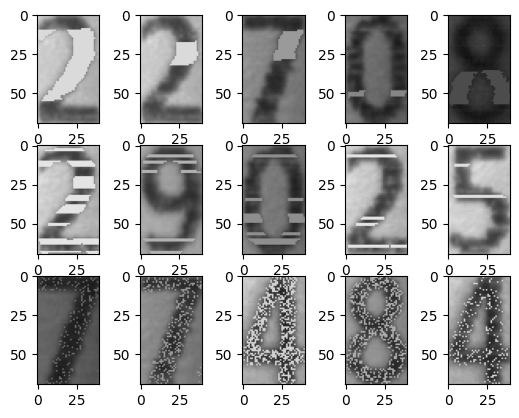

In [3]:
some_defaults_blob = df_blob.sample(n = 5)
some_defaults_row = df_row.sample(n = 5)
some_defaults_noise = df_noise.sample(n = 5)

fig, axs = plt.subplots(3, 5)

for i in range(5):
    filepath = some_defaults_blob.iloc[i]["file_path"]
    img = cv.imread(filepath)
    axs[0,i].imshow(img,'gray')
    
for i in range(5):
    filepath = some_defaults_row.iloc[i]["file_path"]
    img = cv.imread(filepath)
    axs[1,i].imshow(img,'gray')
    
for i in range(5):
    filepath = some_defaults_noise.iloc[i]["file_path"]
    img = cv.imread(filepath)
    axs[2,i].imshow(img,'gray')


# CONFUSION MATRIX BLOB

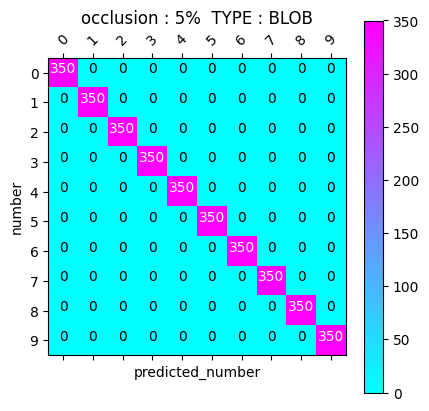

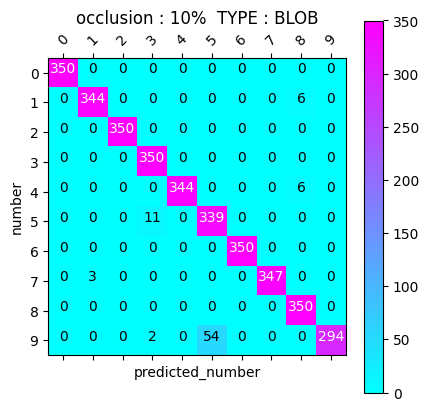

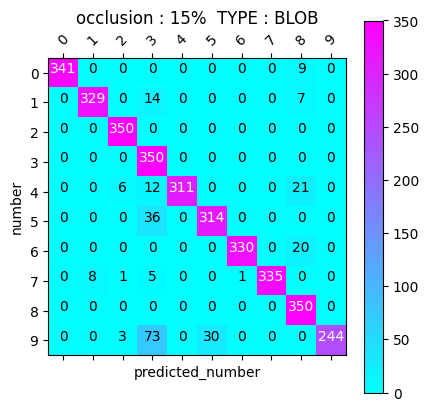

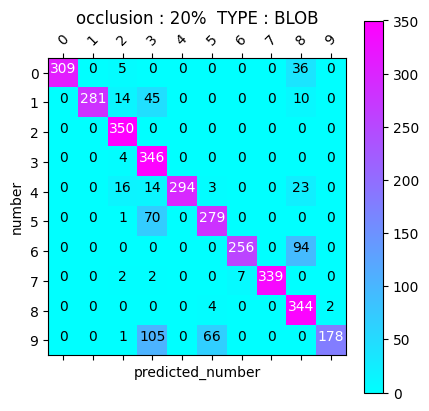

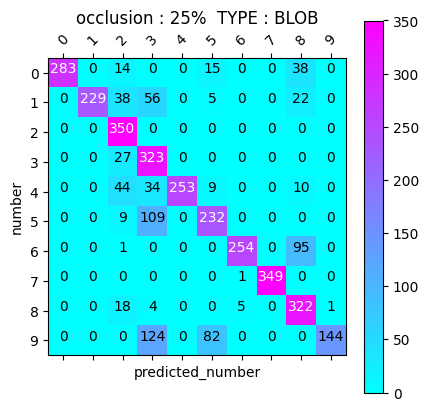

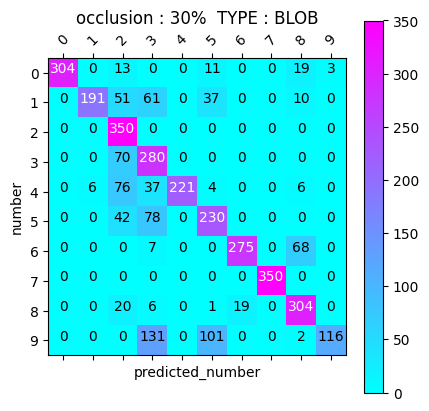

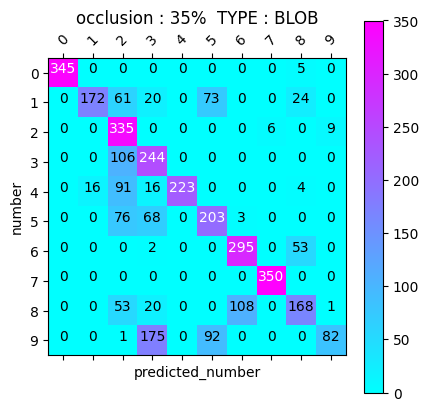

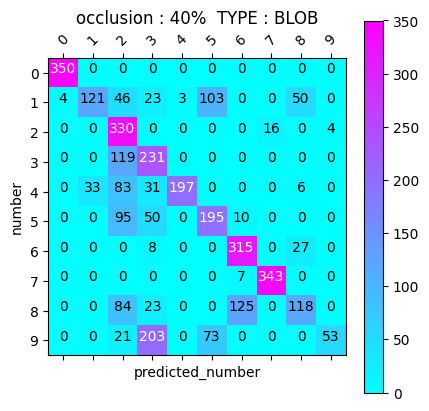

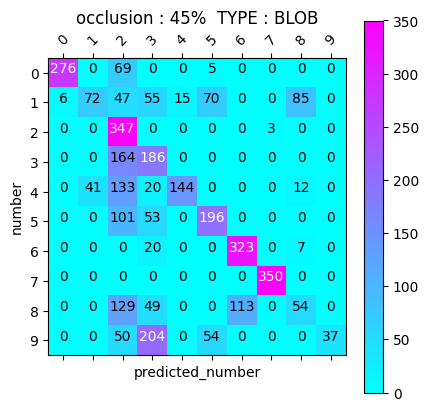

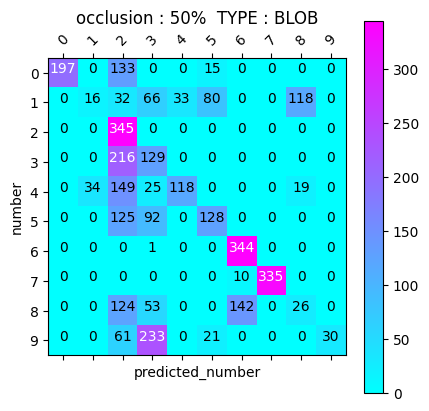

In [4]:
for percent in [5,10,15,20,25,30,35,40,45,50]:
    df_percent = df_blob[df_blob["percentage_of_occlusion"] == percent]
    
    y_actu = df_percent["number"]
    y_pred = df_percent["predicted_number"]
    
    
    df_confusion = pd.crosstab(y_actu, y_pred)

    
    
    
    title = "occlusion : "+ str(percent) + "%" + "  TYPE : BLOB"
    fig = plot_confusion_matrix(df_confusion, title = title)

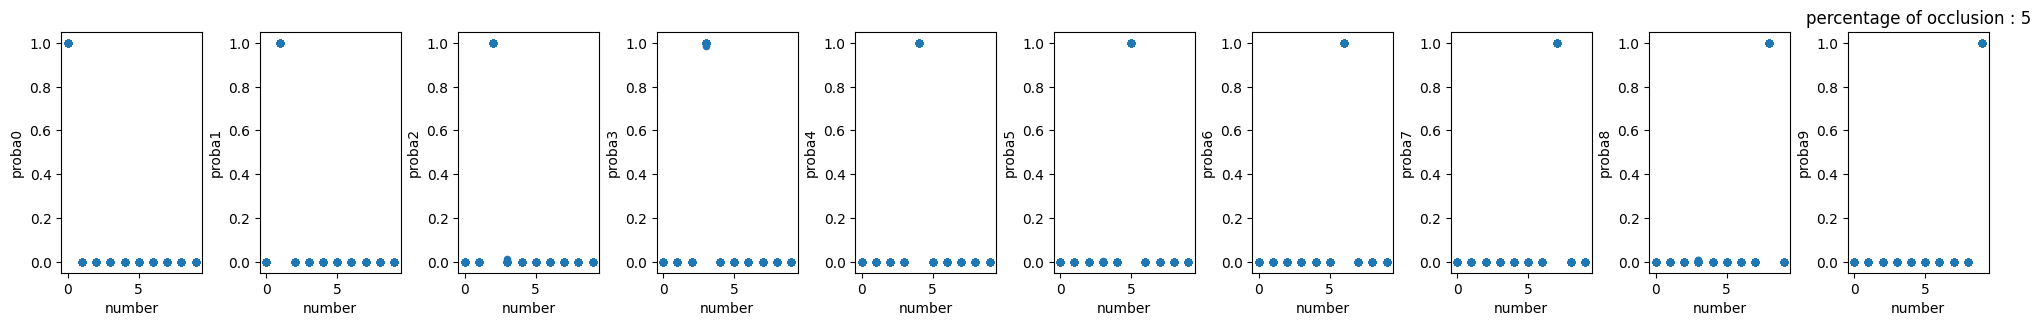

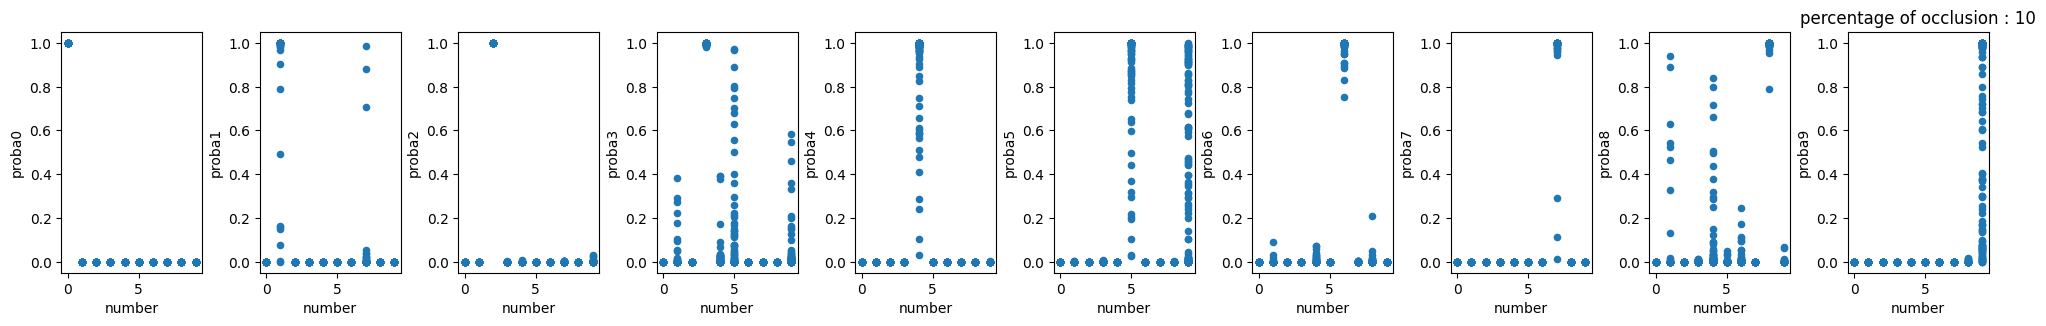

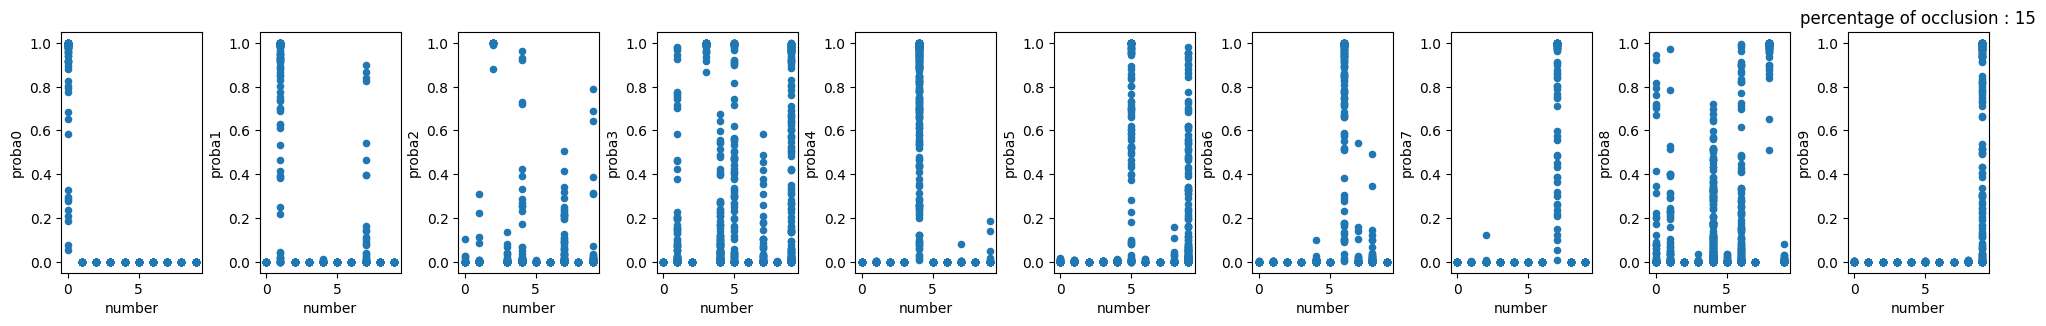

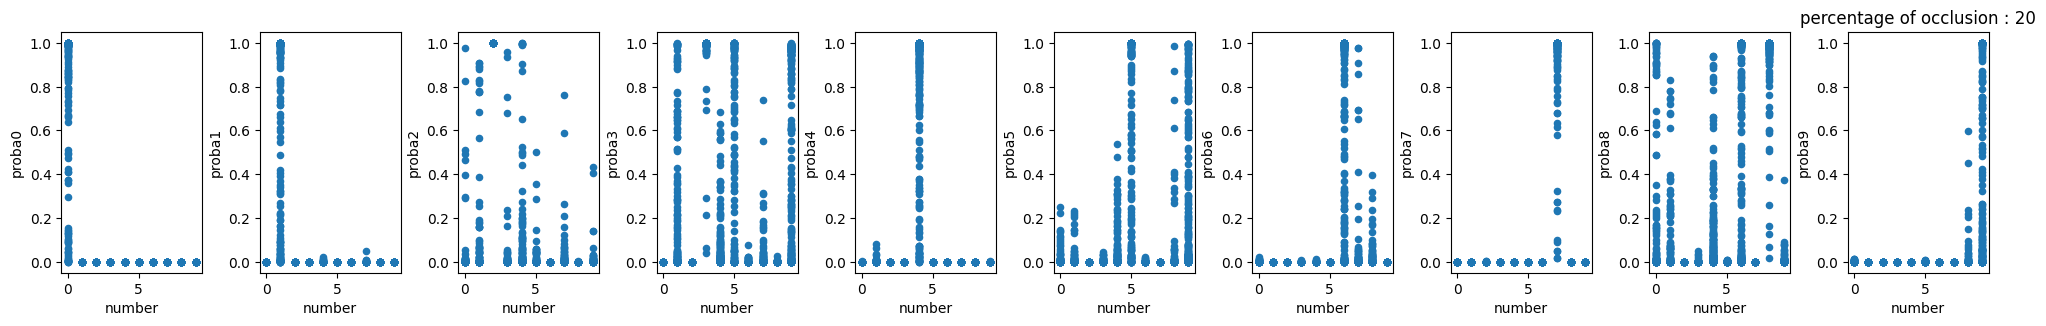

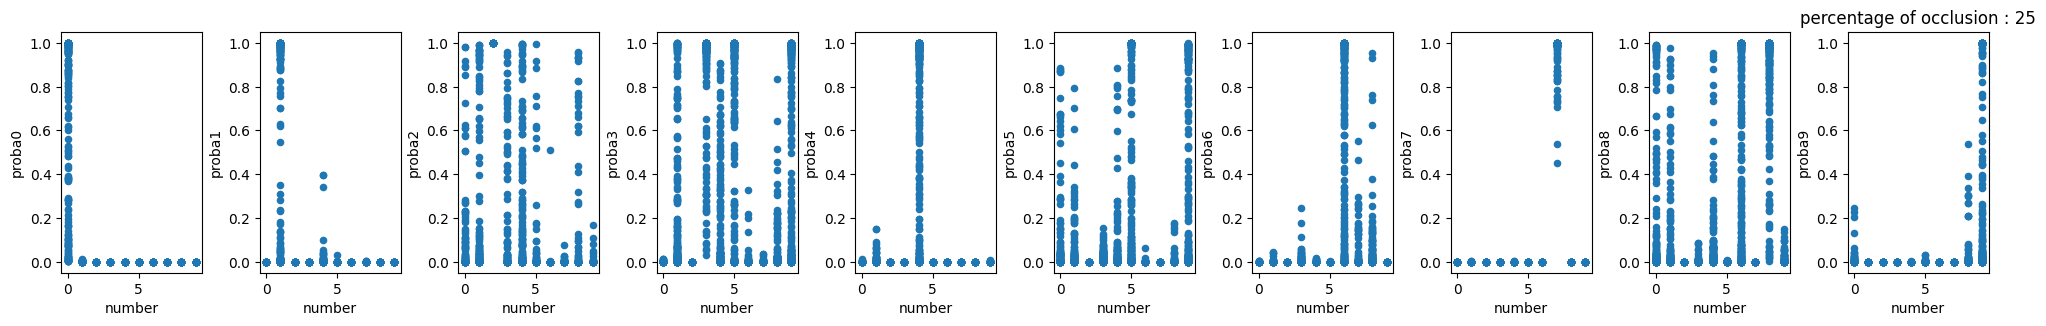

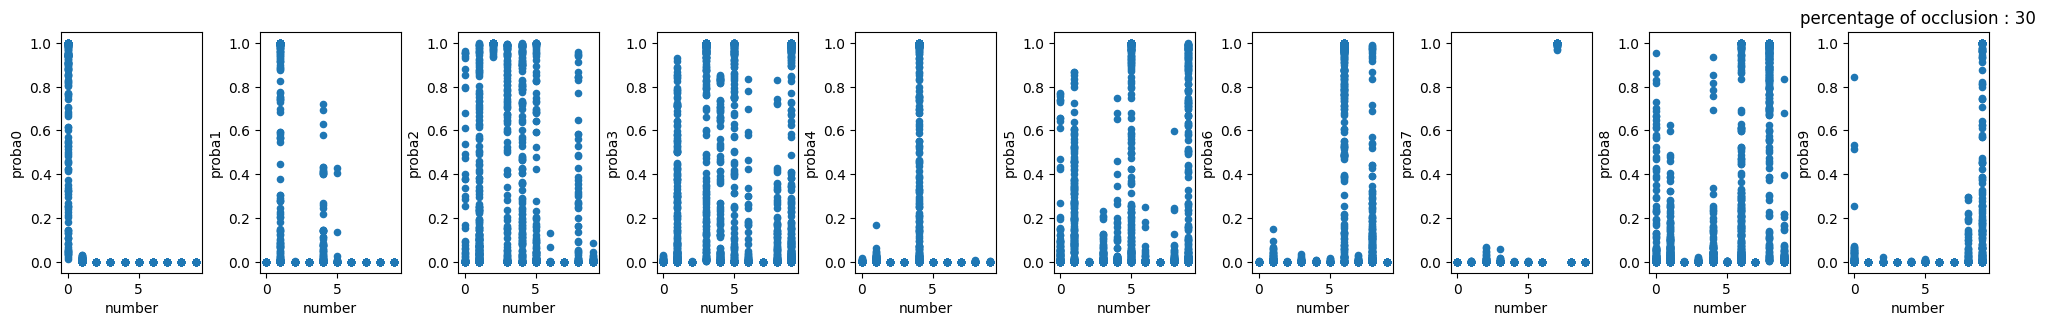

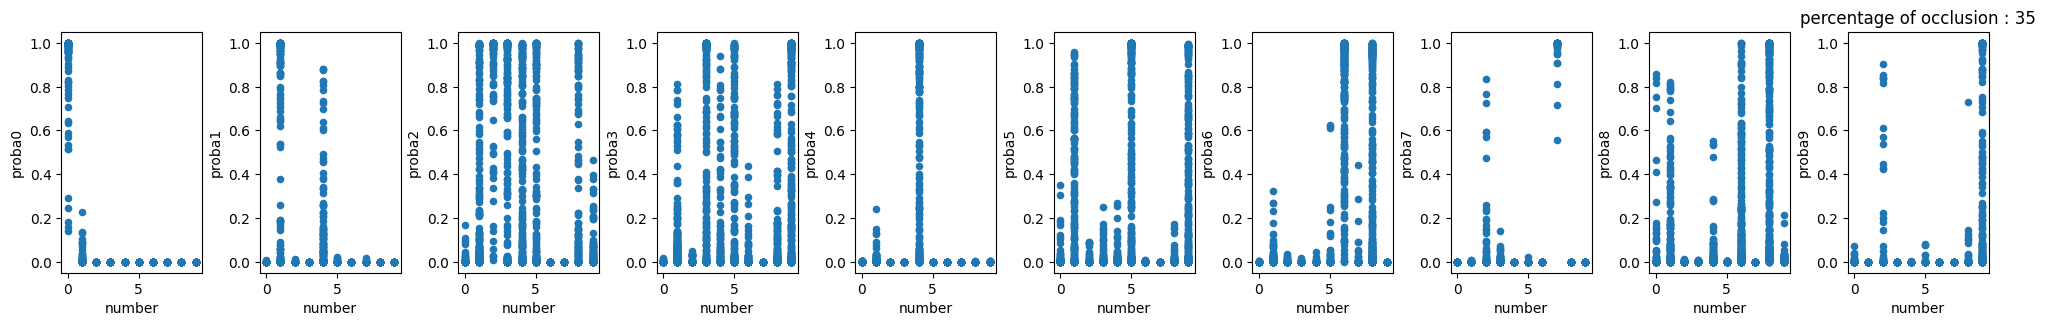

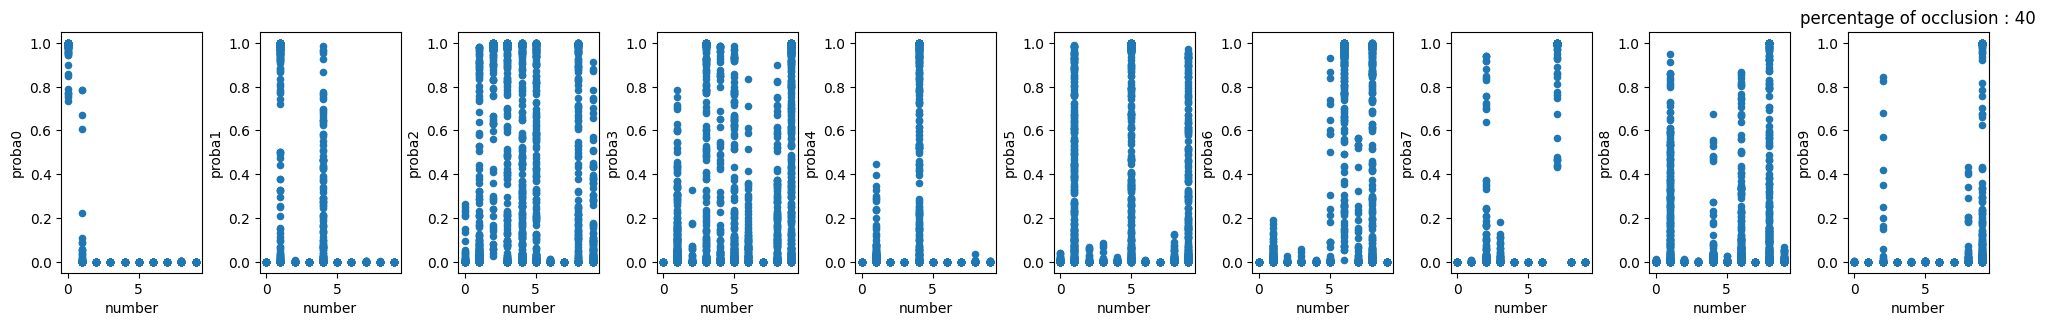

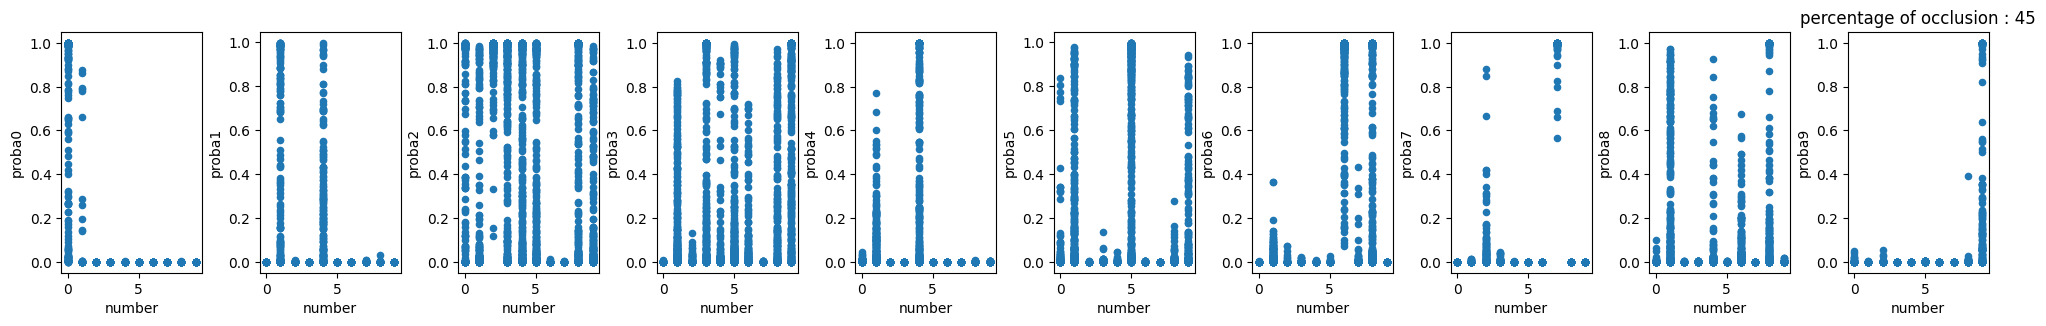

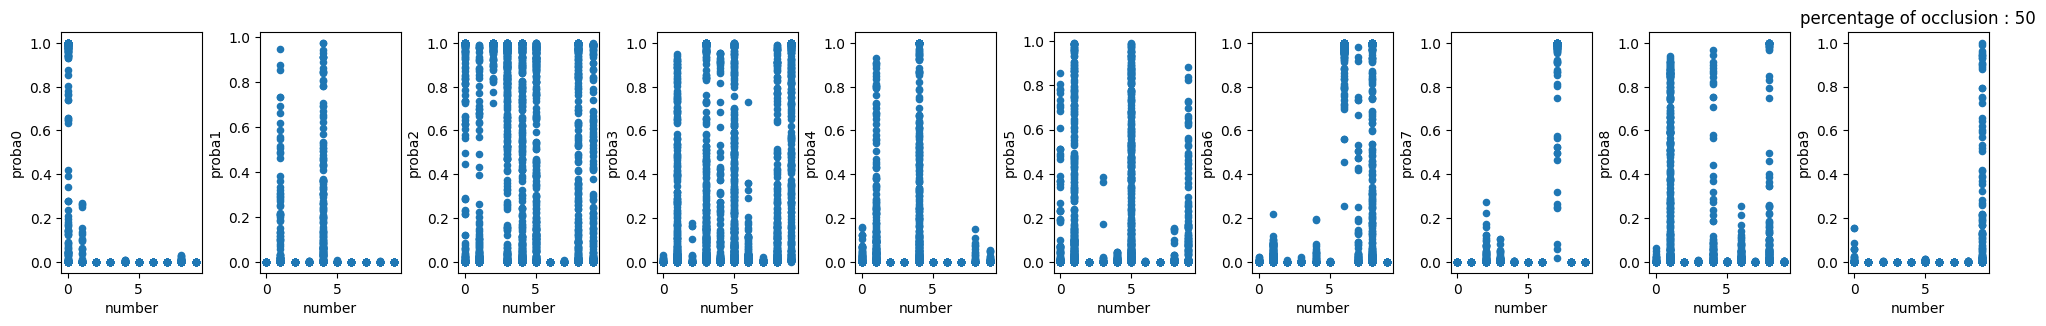

In [5]:
for percent in [5,10,15,20,25,30,35,40,45,50]:
    fig, ax = plt.subplots(1,10,figsize = (20,3),sharex=False, sharey=False)
    fig.tight_layout(h_pad = 3)
    plt.title("percentage of occlusion : " + str(percent))
    for i in range(10):
        df_blob[df_blob["percentage_of_occlusion"] == percent].plot.scatter(x = "number", y = "proba"+str(i), ax =ax[i])
        ax[i].set(xlabel="number")
        
    plt.show()

# CONFUSION MATRIX ROW

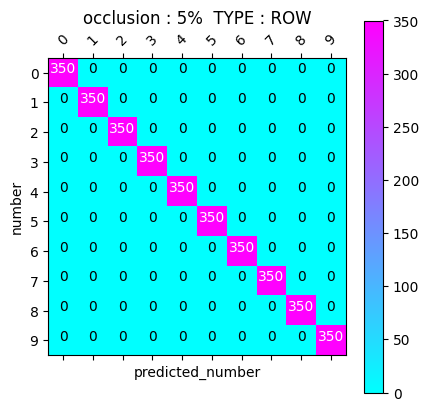

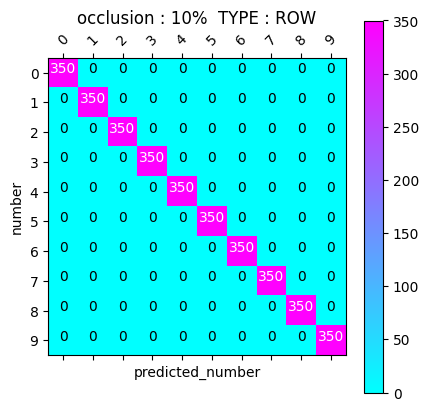

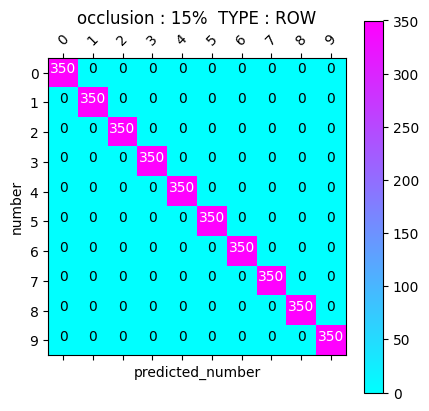

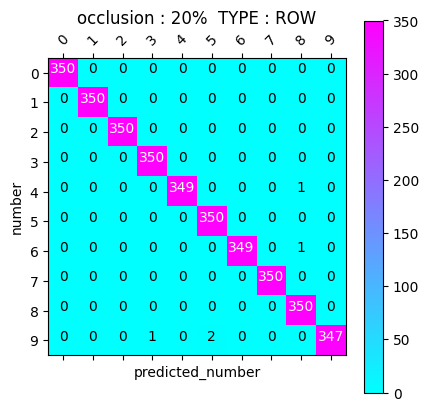

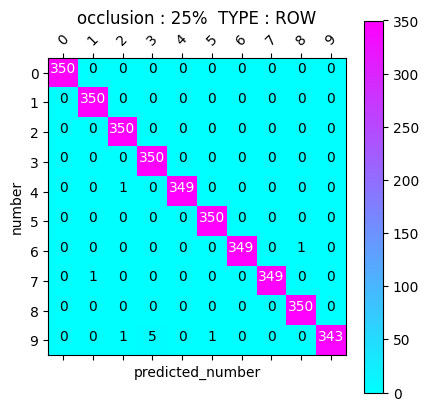

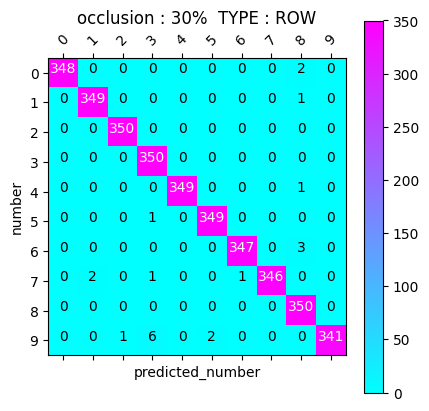

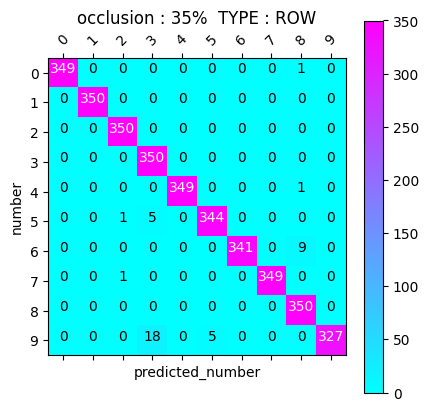

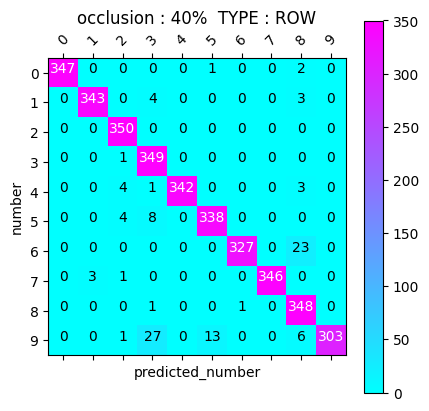

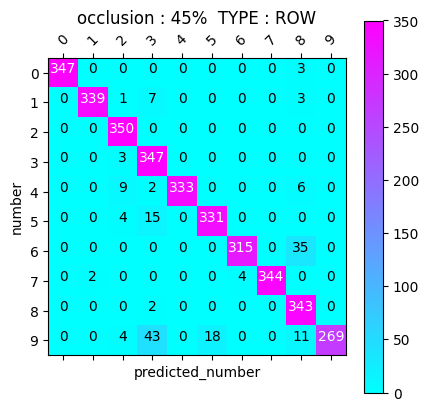

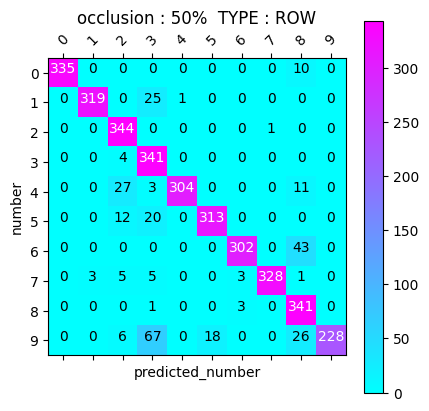

In [6]:
for percent in [5,10,15,20,25,30,35,40,45,50]:
    df_percent = df_row[df_row["percentage_of_occlusion"] == percent]
    
    y_actu = df_percent["number"]
    y_pred = df_percent["predicted_number"]
    
    
    df_confusion = pd.crosstab(y_actu, y_pred)

    
    
    
    title = "occlusion : "+ str(percent) + "%" + "  TYPE : ROW"
    fig = plot_confusion_matrix(df_confusion, title = title)

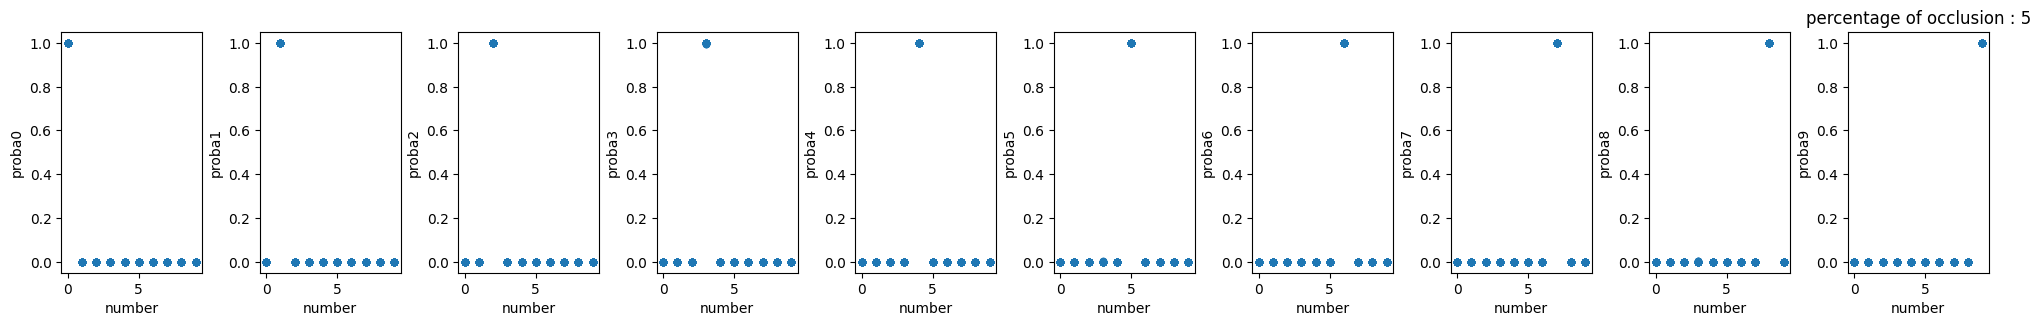

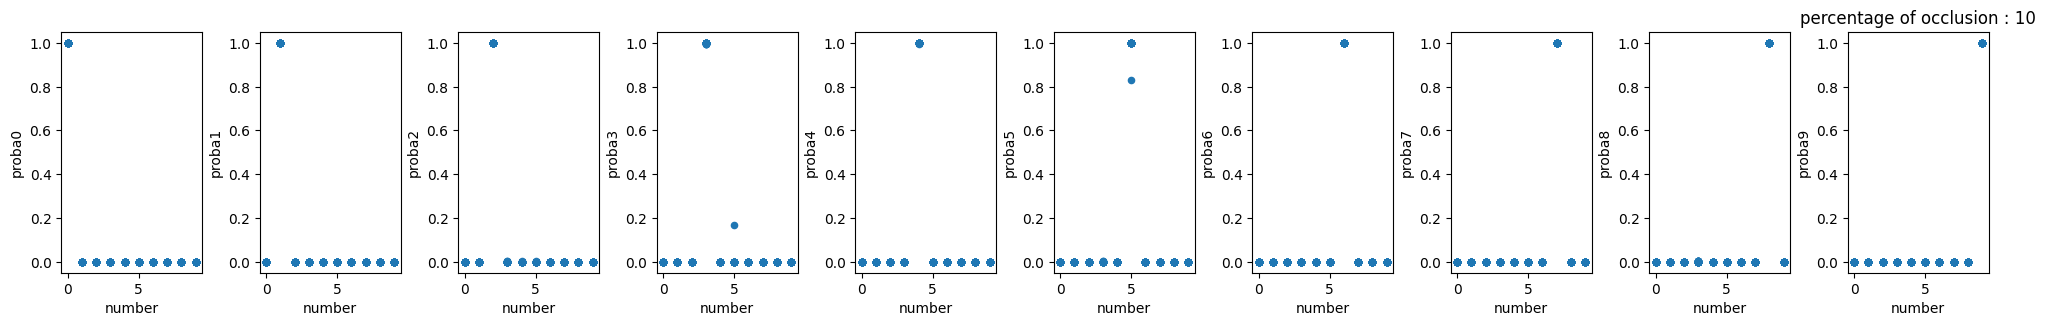

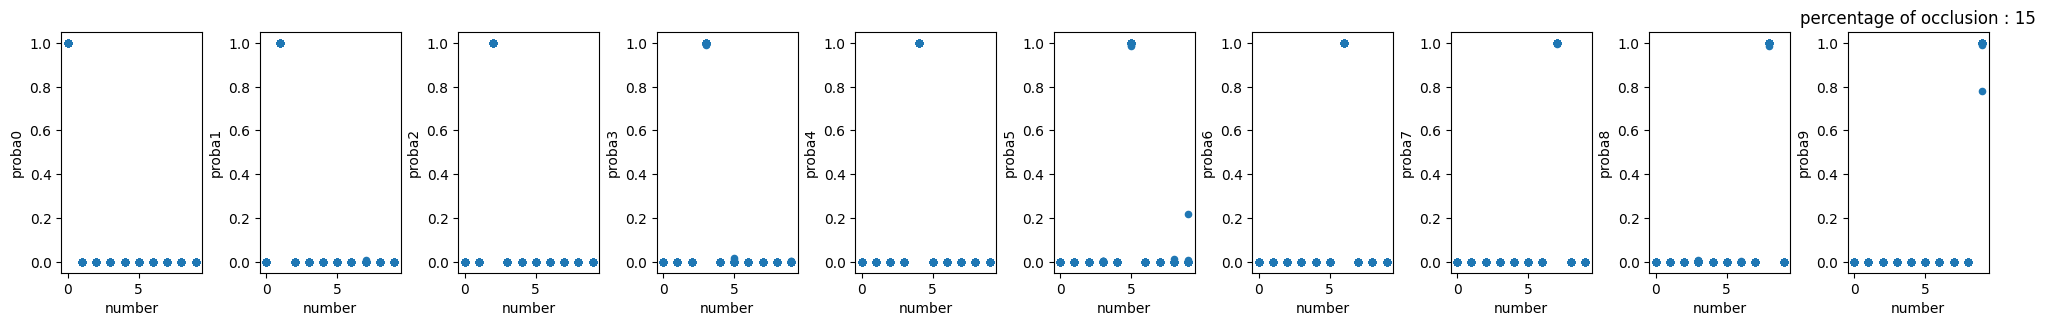

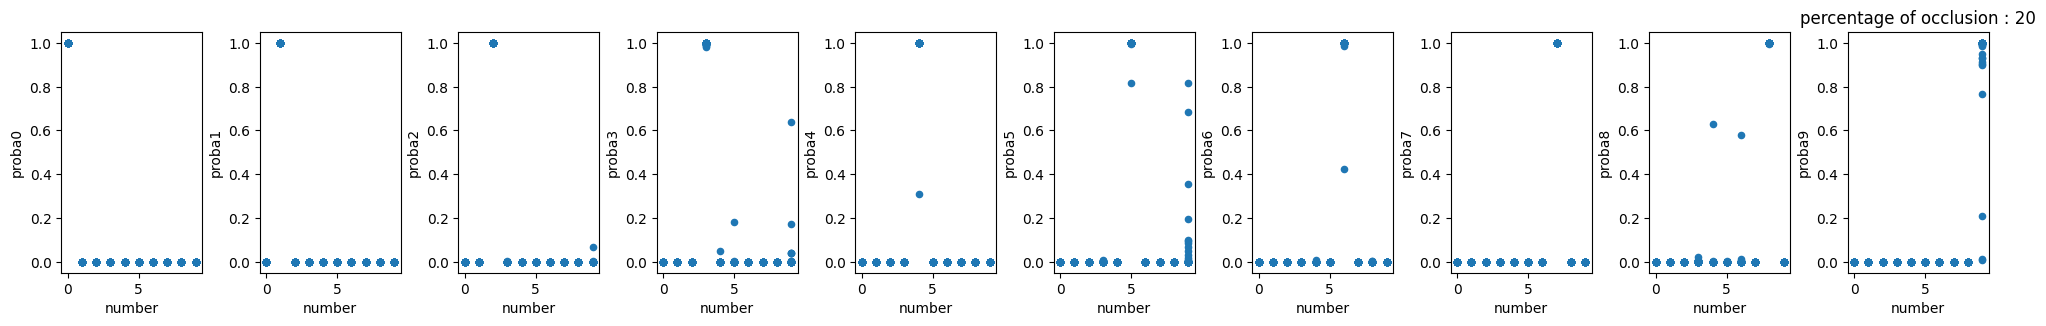

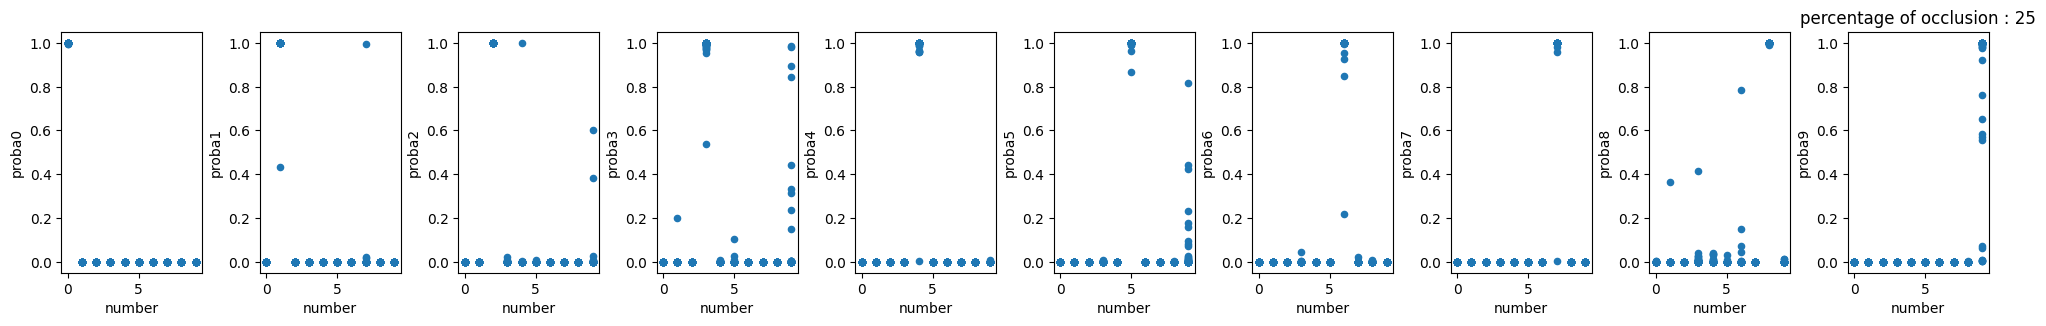

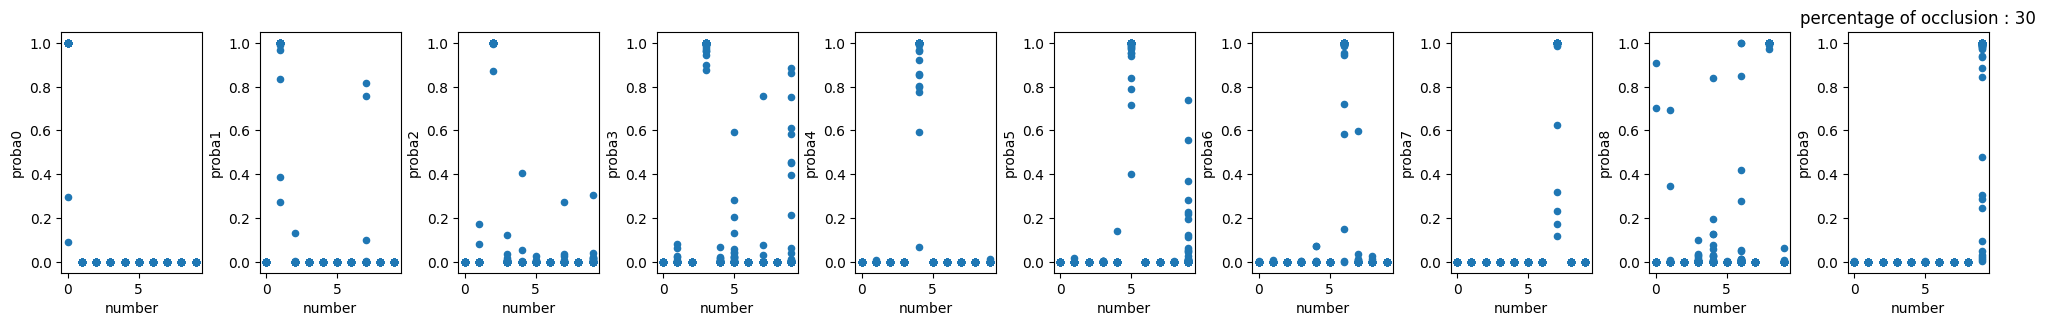

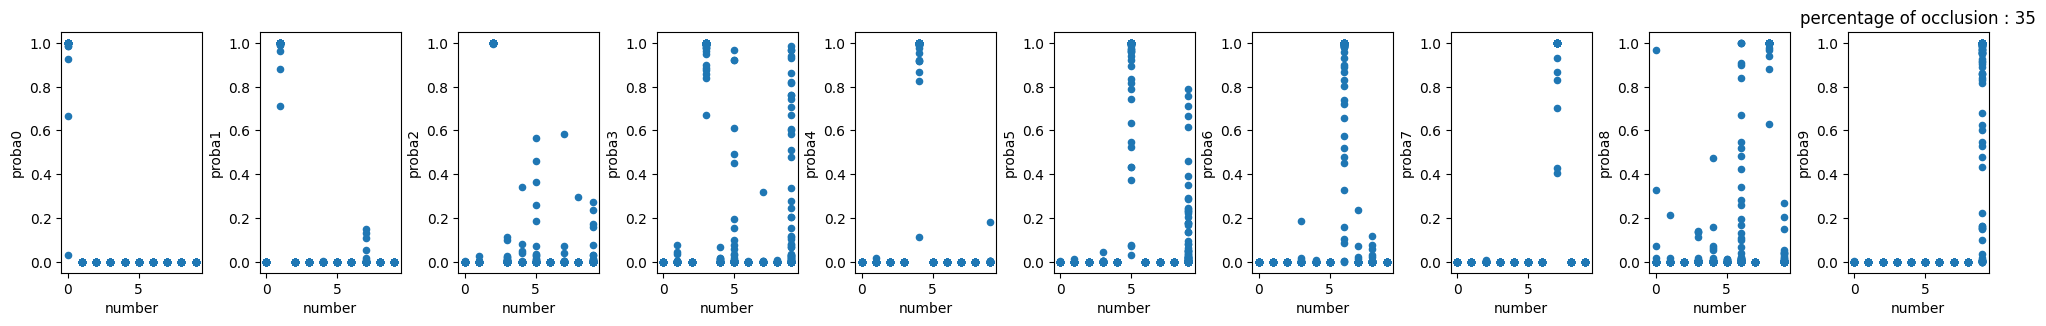

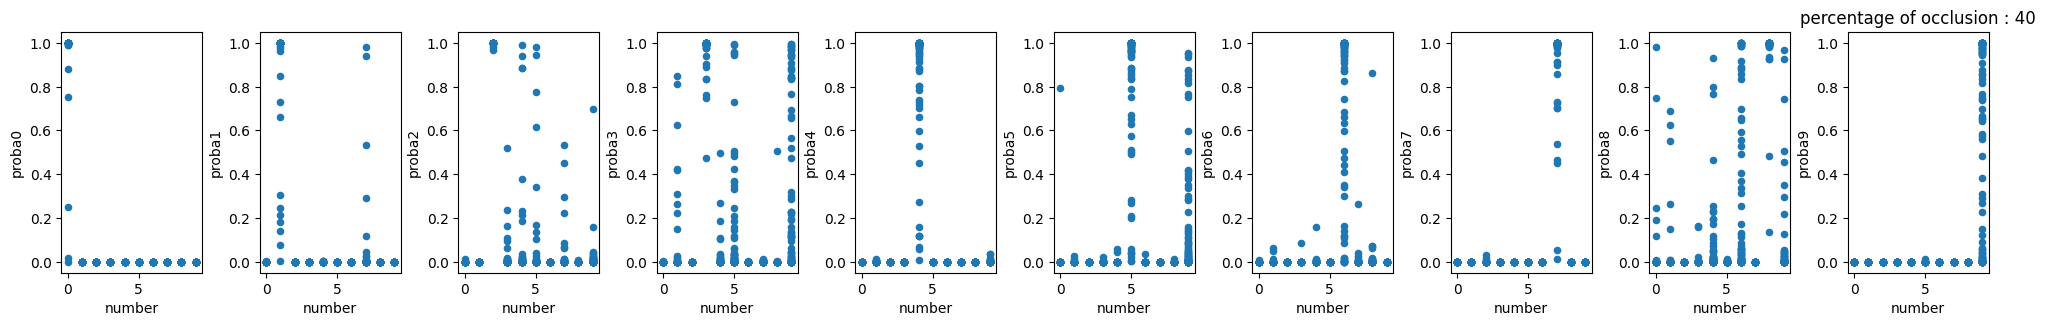

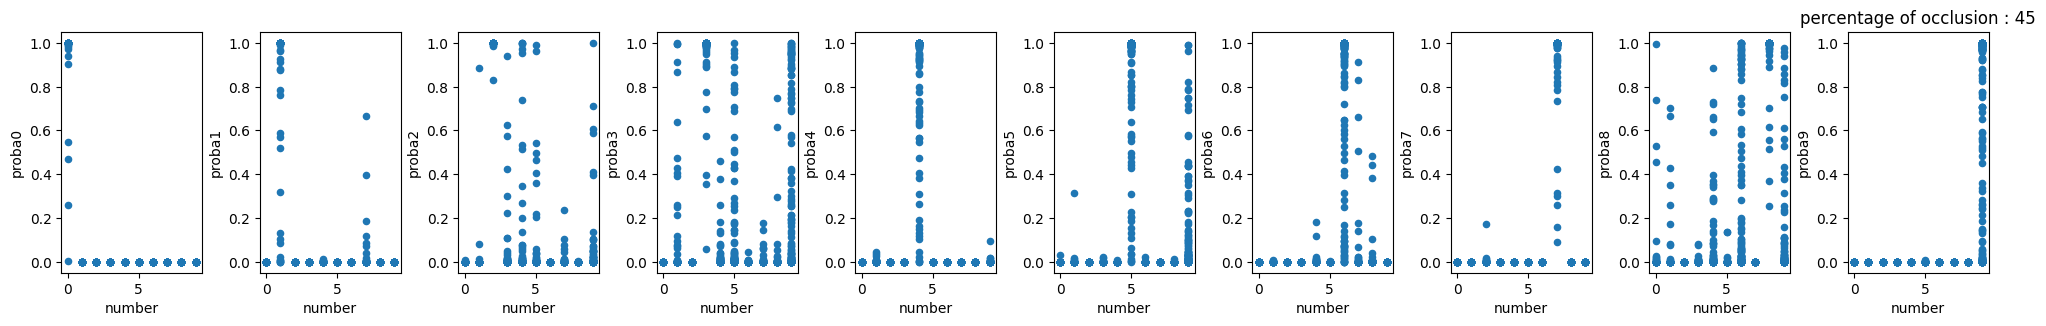

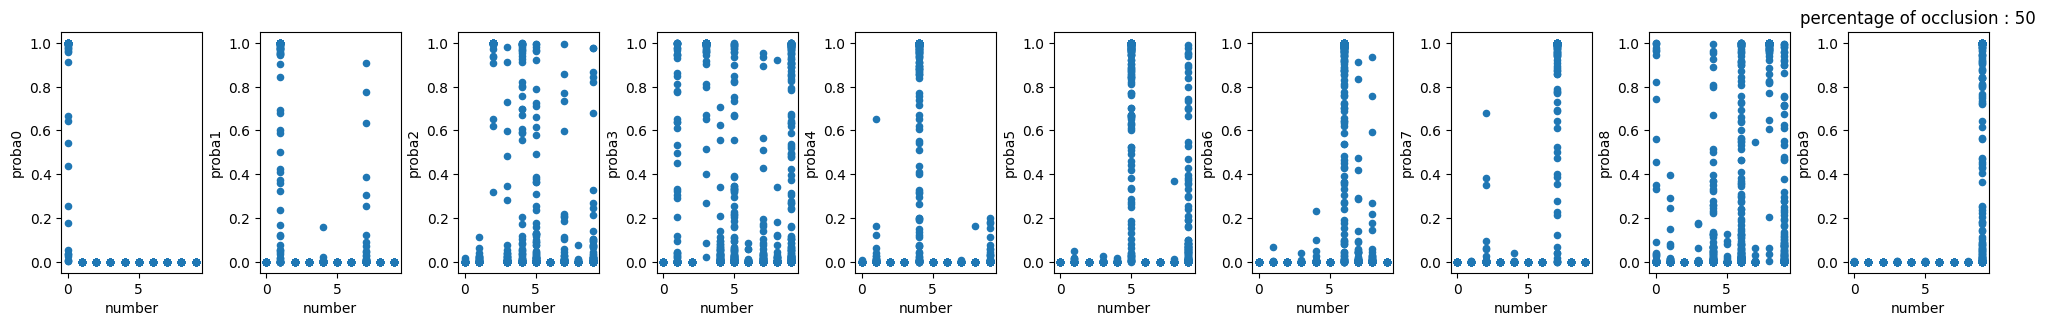

In [7]:
for percent in [5,10,15,20,25,30,35,40,45,50]:
    fig, ax = plt.subplots(1,10,figsize = (20,3),sharex=False, sharey=False)
    fig.tight_layout(h_pad = 3)
    plt.title("percentage of occlusion : " + str(percent))
    for i in range(10):
        df_row[df_row["percentage_of_occlusion"] == percent].plot.scatter(x = "number", y = "proba"+str(i), ax =ax[i])
        ax[i].set(xlabel="number")
        
    plt.show()

# CONFUSION MATRIX NOISE

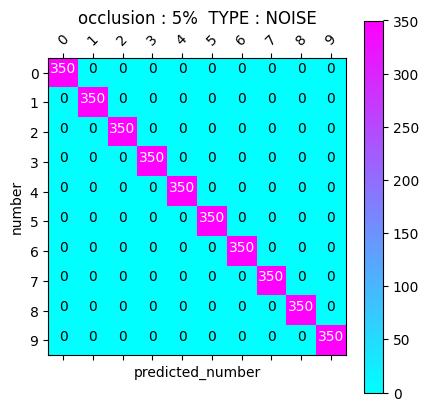

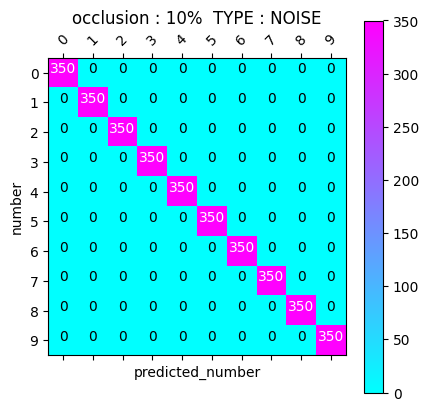

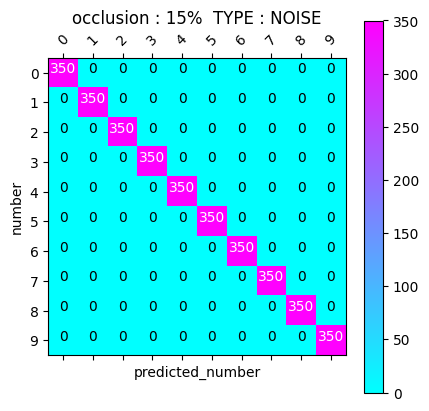

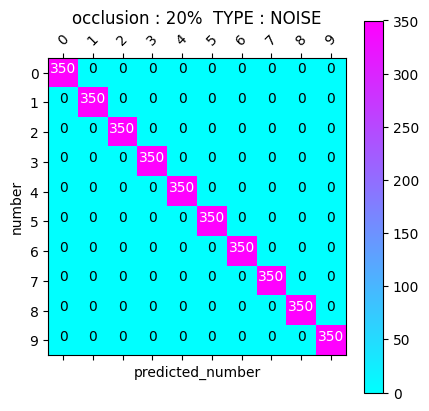

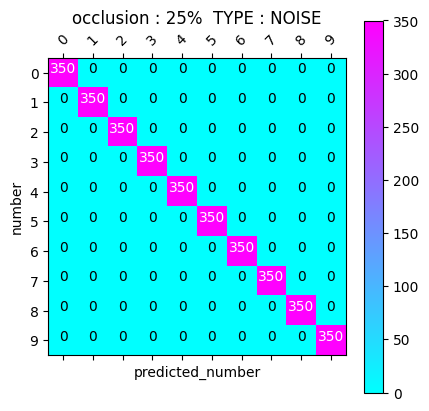

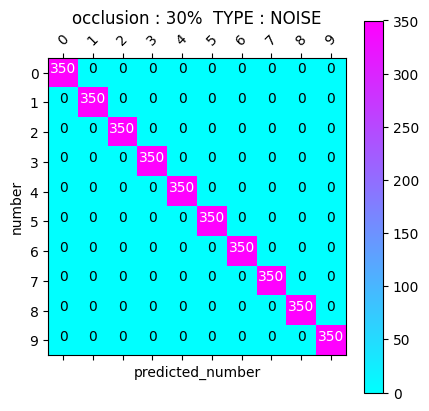

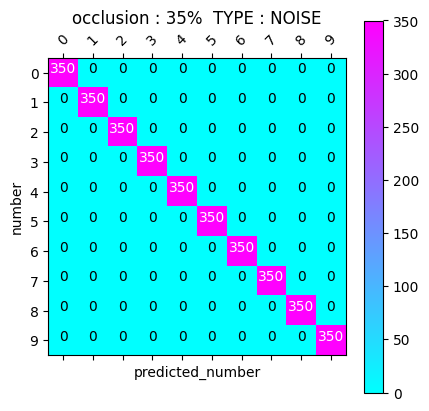

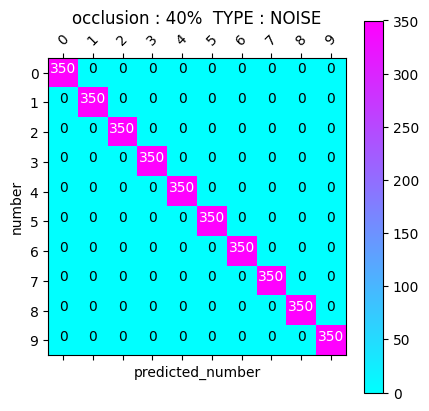

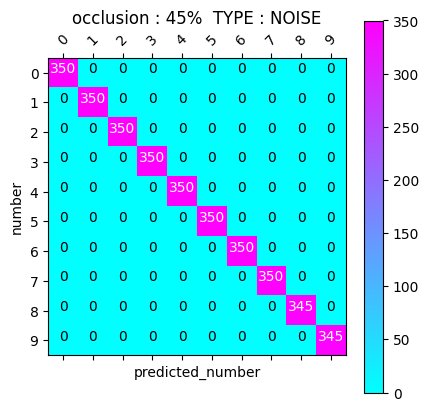

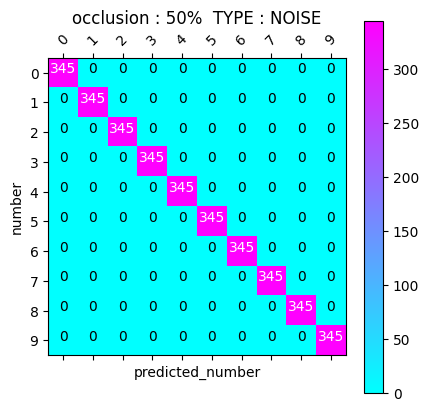

In [8]:
for percent in [5,10,15,20,25,30,35,40,45,50]:
    df_percent = df_noise[df_noise["percentage_of_occlusion"] == percent]
    
    y_actu = df_percent["number"]
    y_pred = df_percent["predicted_number"]
    
    
    df_confusion = pd.crosstab(y_actu, y_pred)

    
    
    
    title = "occlusion : "+ str(percent) + "%" + "  TYPE : NOISE"
    fig = plot_confusion_matrix(df_confusion, title = title)

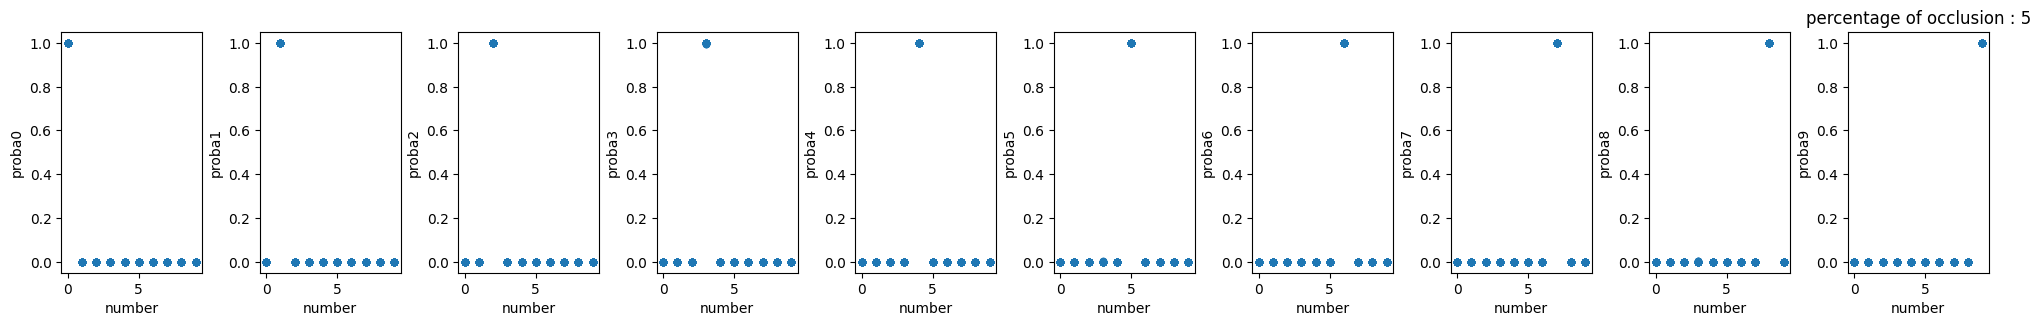

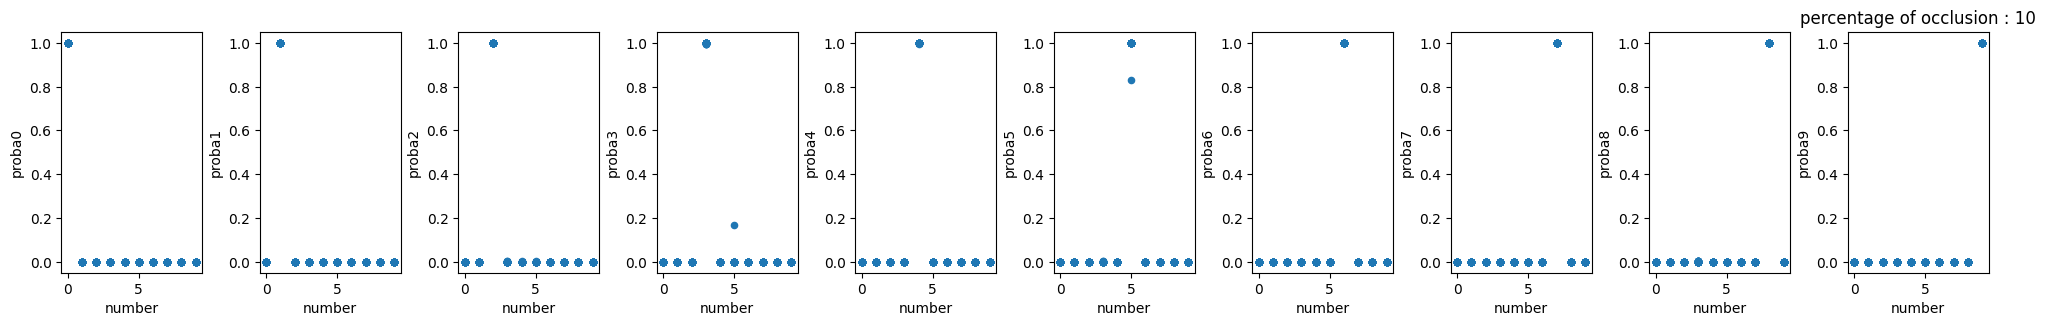

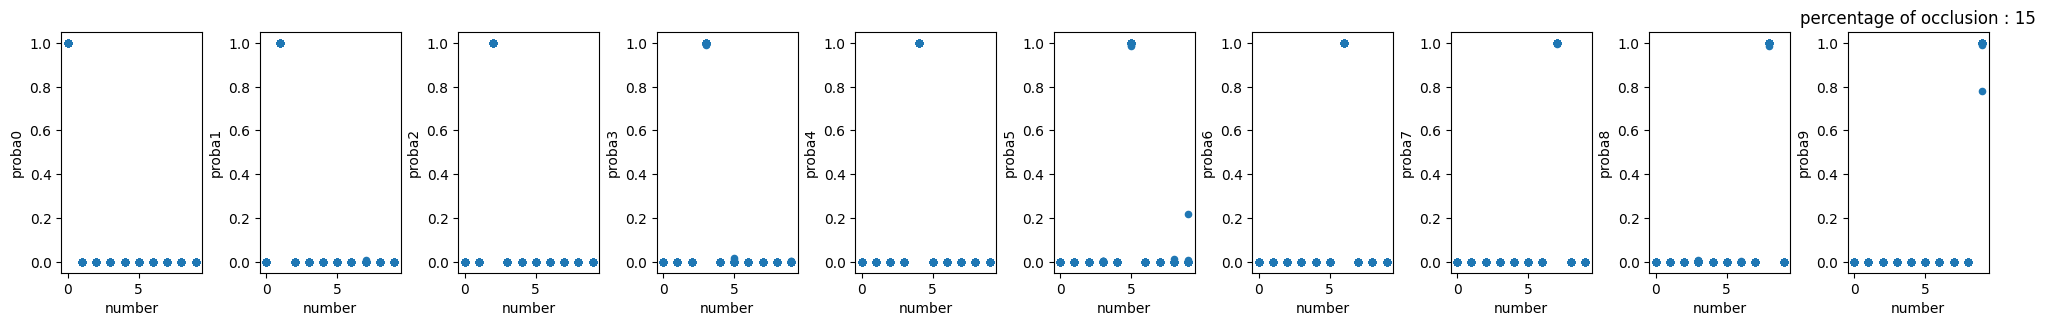

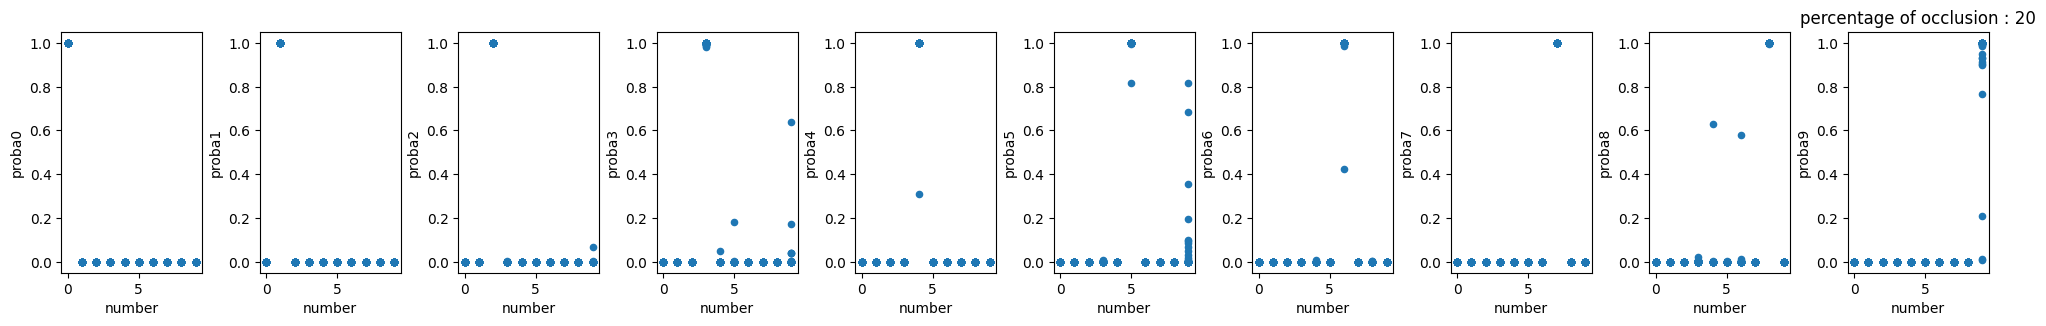

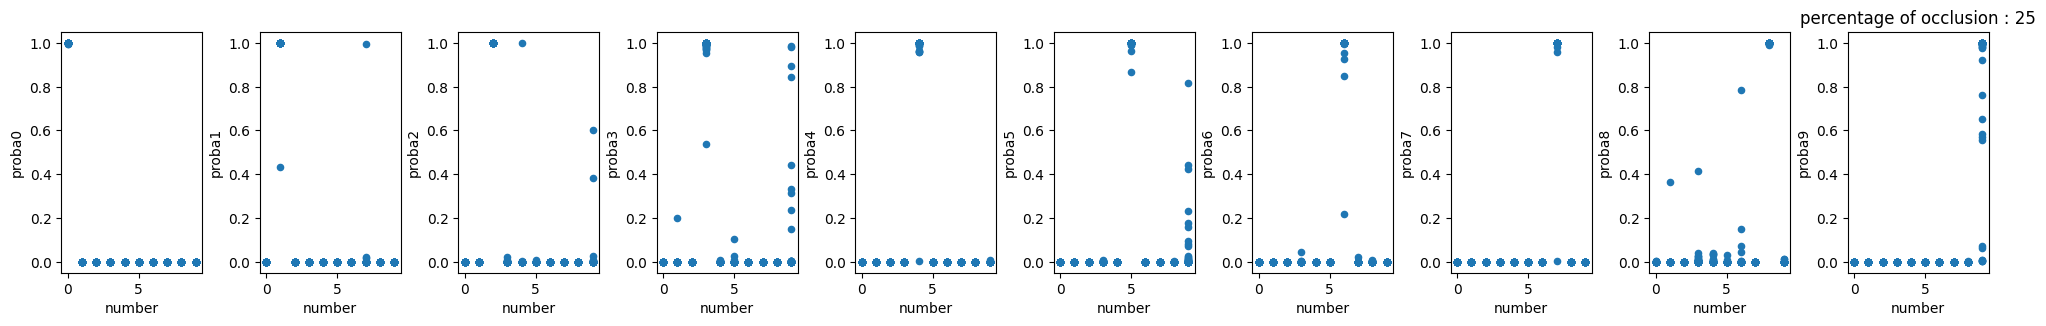

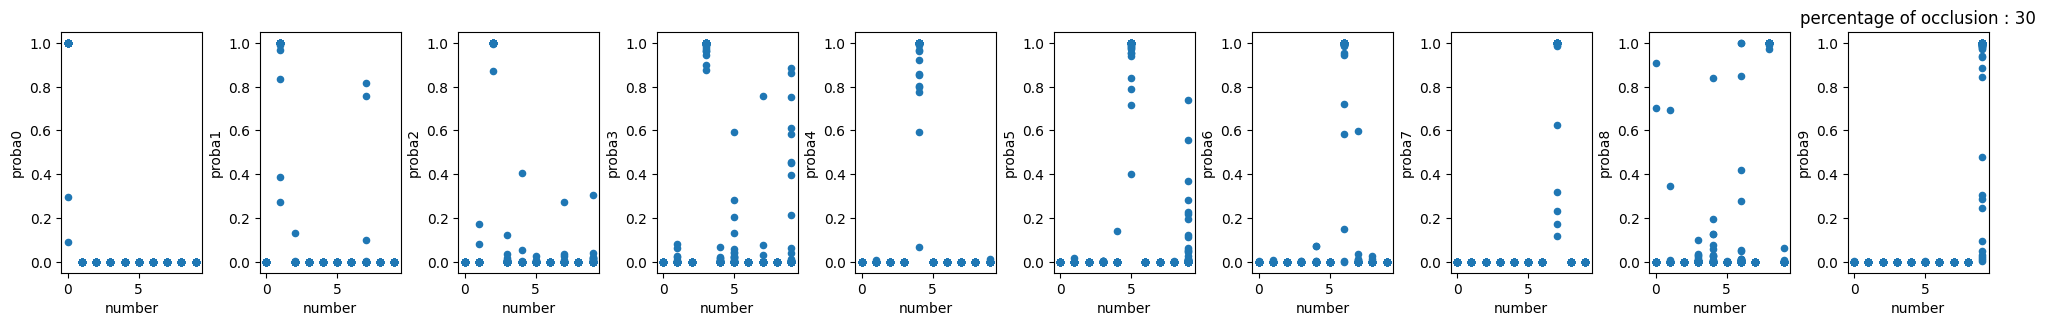

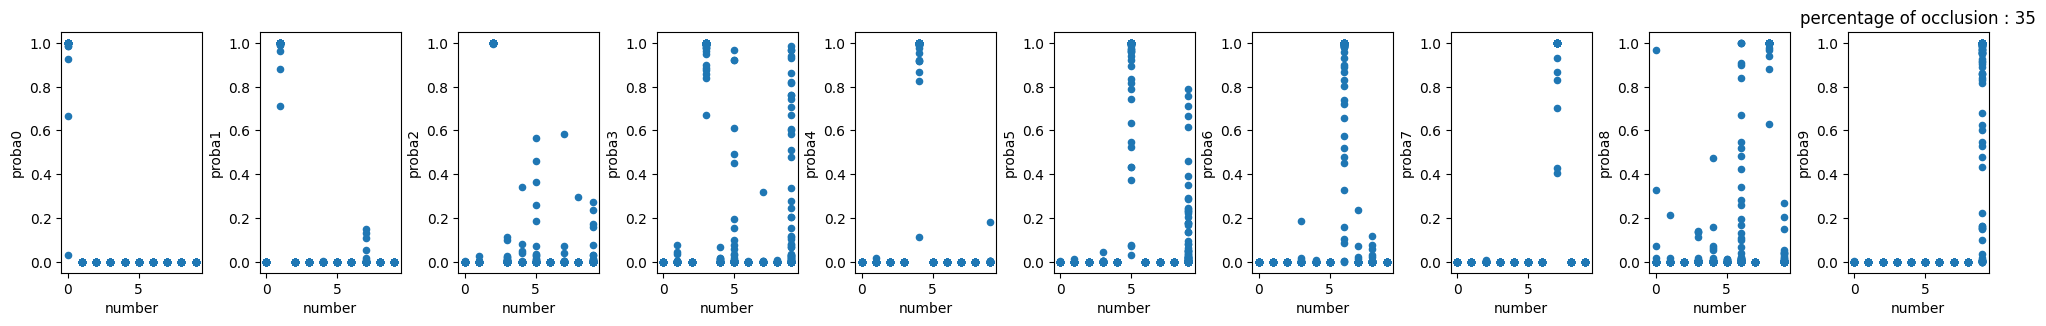

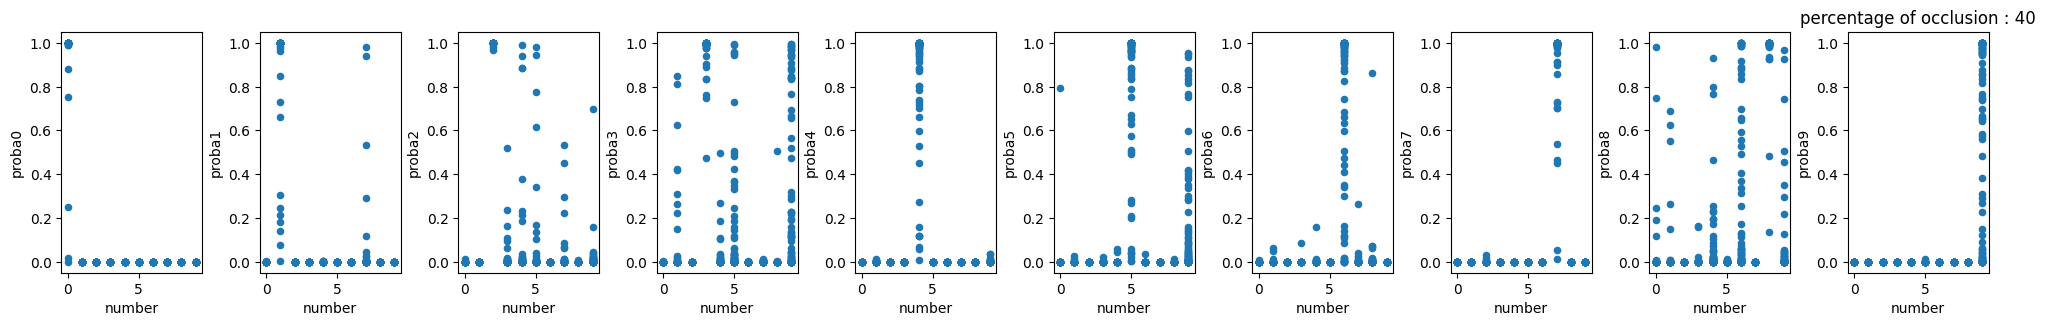

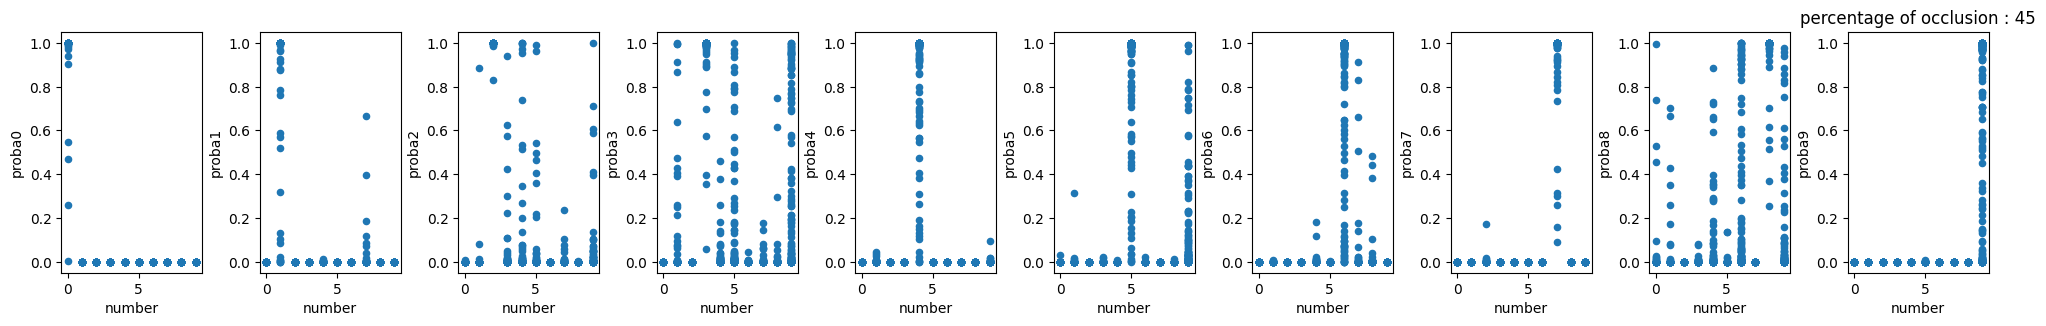

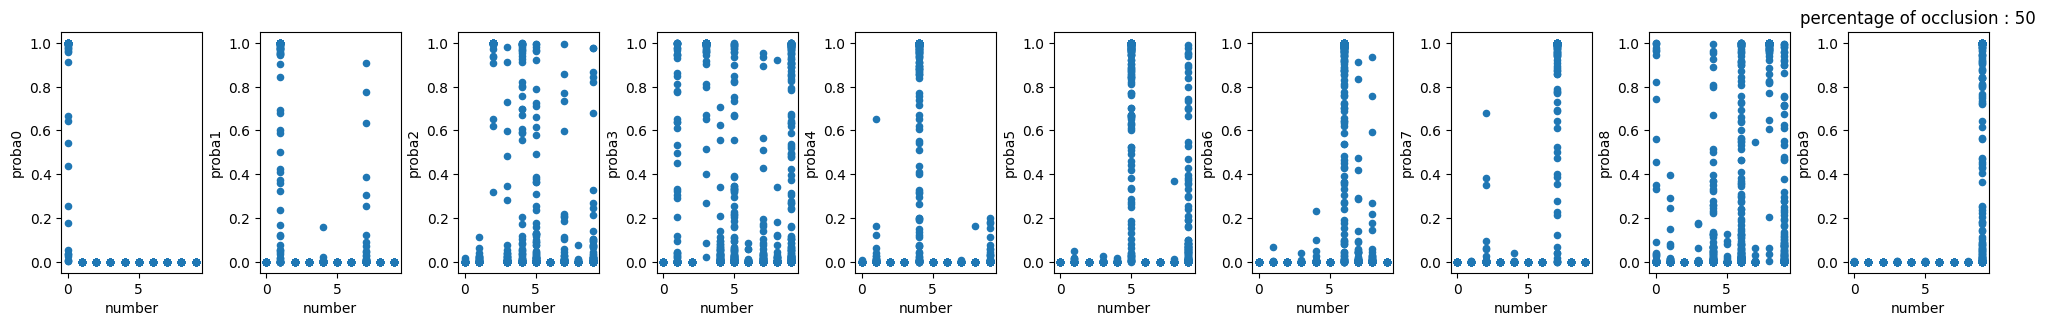

In [9]:
for percent in [5,10,15,20,25,30,35,40,45,50]:
    fig, ax = plt.subplots(1,10,figsize = (20,3),sharex=False, sharey=False)
    fig.tight_layout(h_pad = 3)
    plt.title("percentage of occlusion : " + str(percent))
    for i in range(10):
        df_row[df_row["percentage_of_occlusion"] == percent].plot.scatter(x = "number", y = "proba"+str(i), ax =ax[i])
        ax[i].set(xlabel="number")
        
    plt.show()

# OCR Score Vs occlusion percentage - BLOB

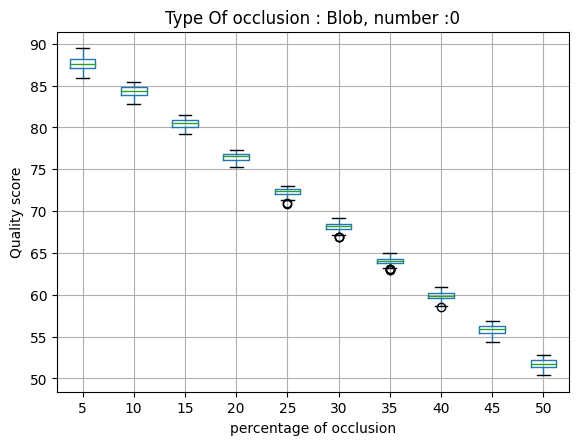

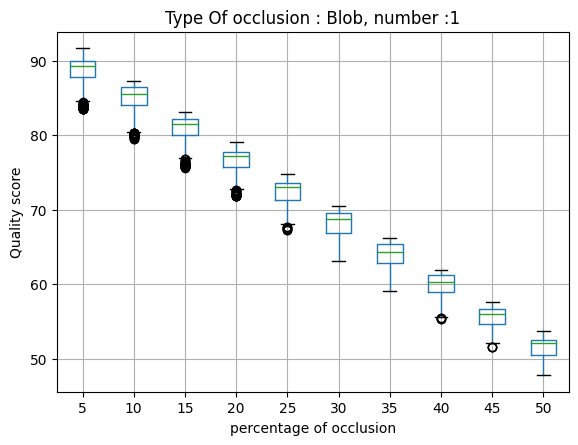

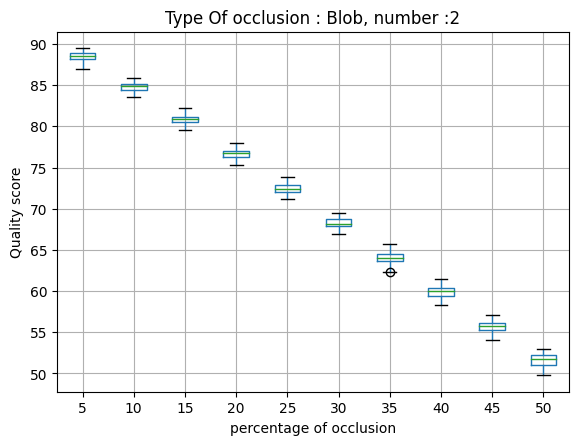

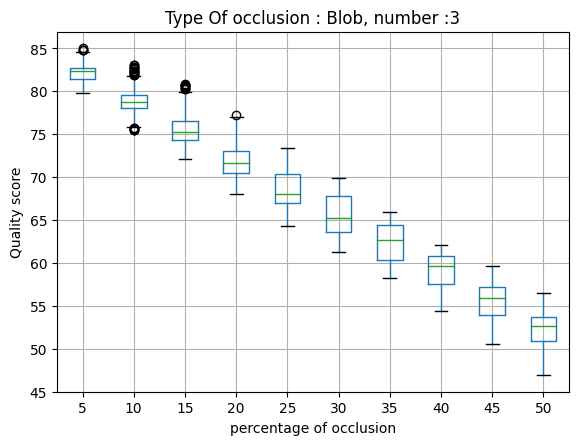

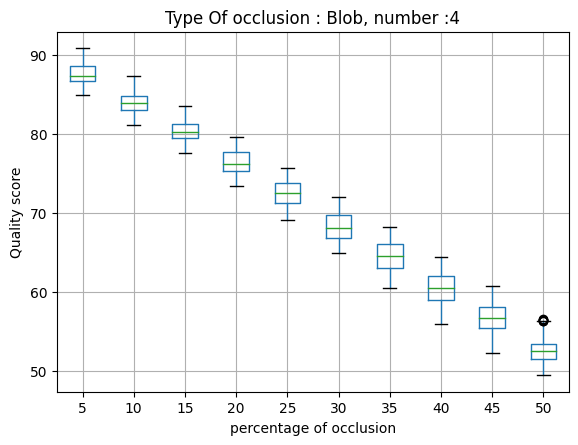

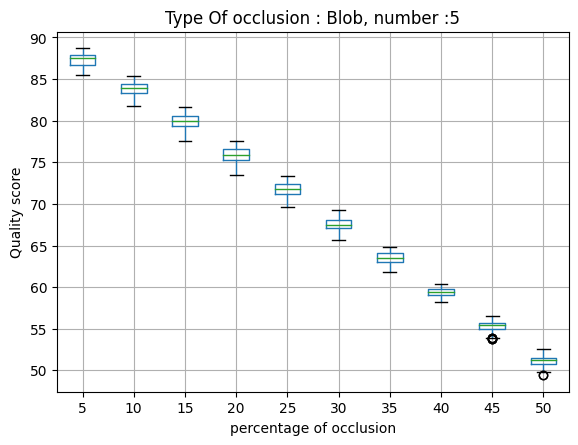

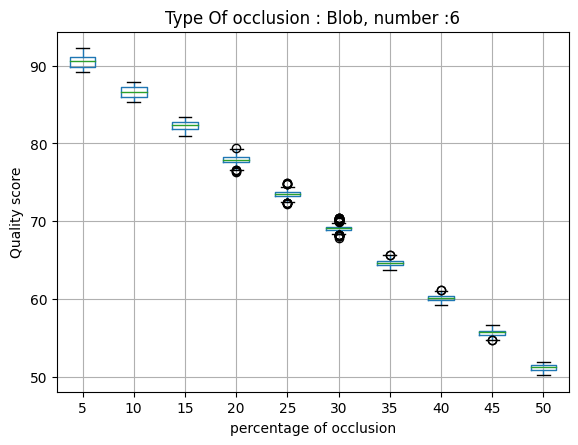

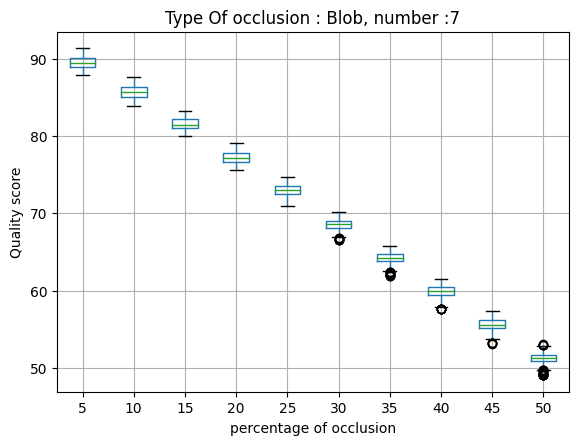

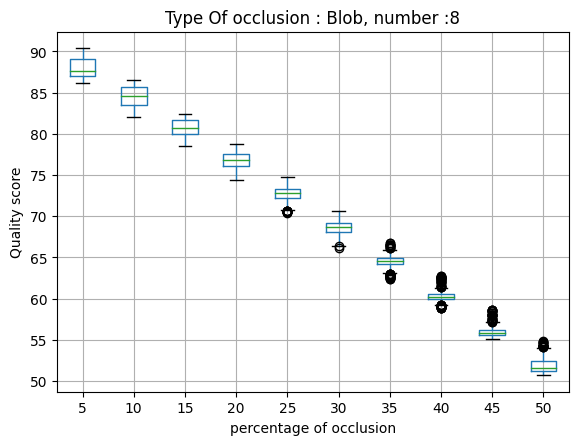

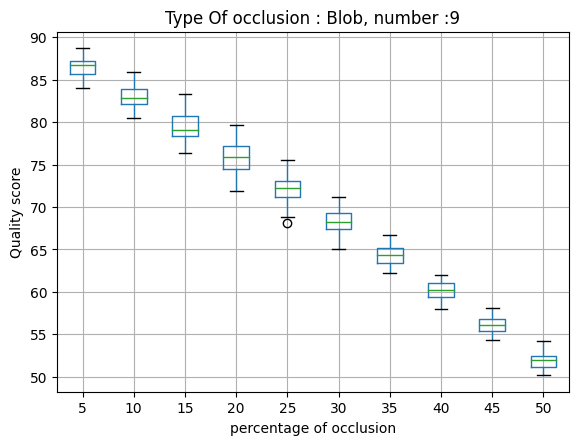

In [10]:
for i in range(10):
    fig, ax = plt.subplots()

    df_blob[df_blob["number"] == i].boxplot(column = ["OCR_score"],by='percentage_of_occlusion', ax =ax)
    plt.title("Type Of occlusion : Blob, number :" + str(i))
    plt.suptitle('')
    plt.xlabel('percentage of occlusion')
    plt.ylabel("Quality score")
    plt.show()

# OCR Score Vs occlusion percentage - ROW

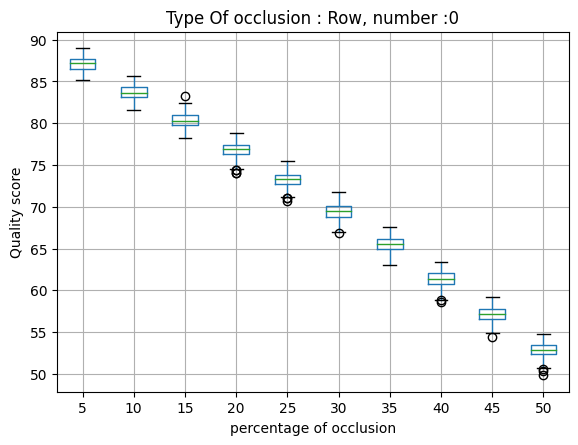

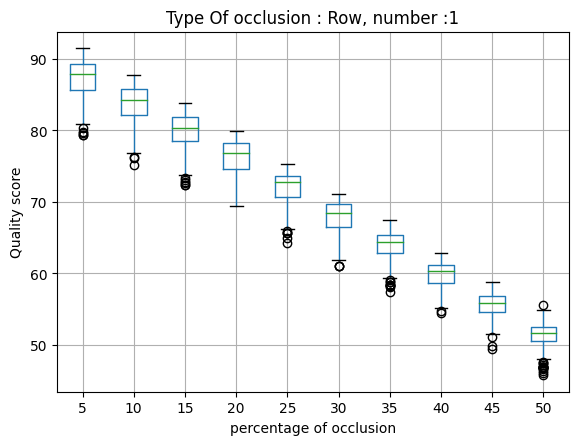

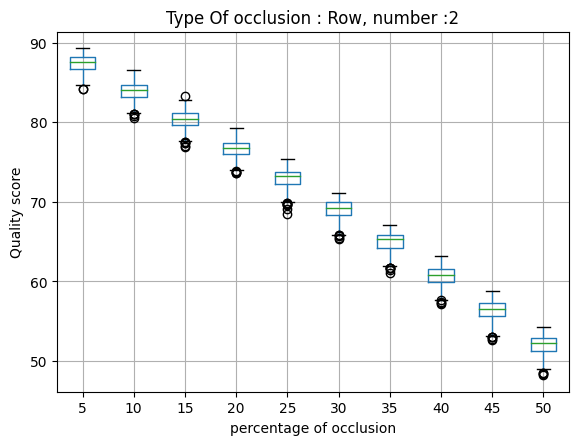

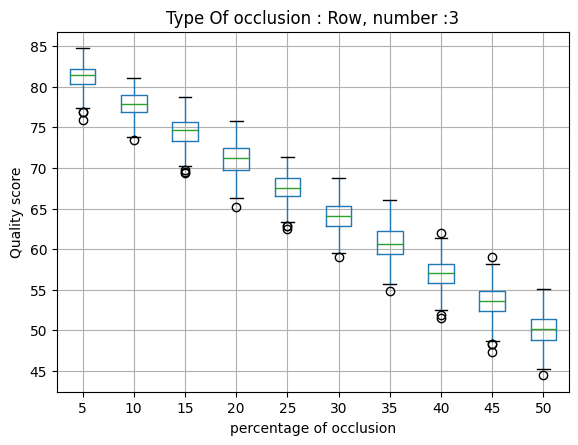

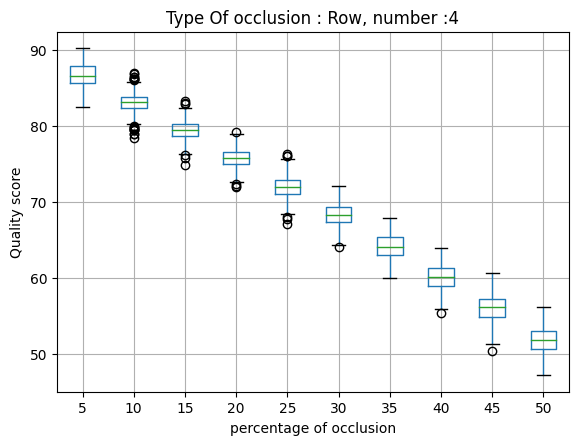

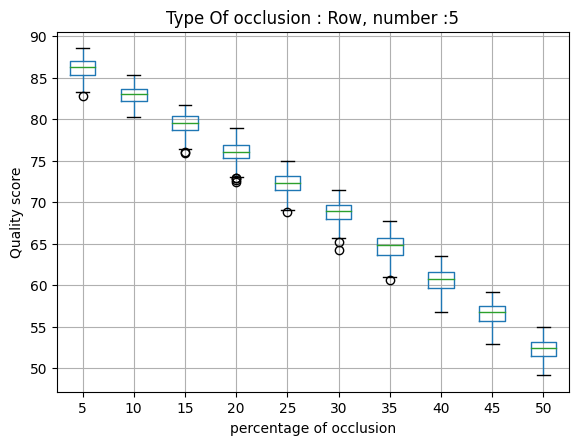

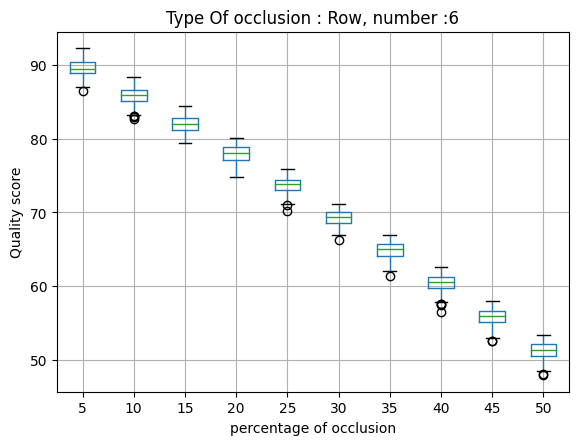

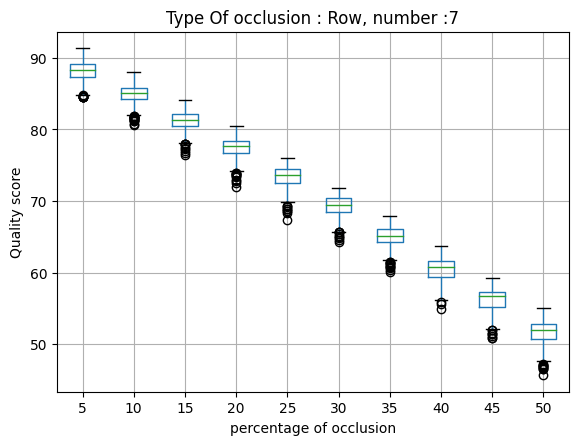

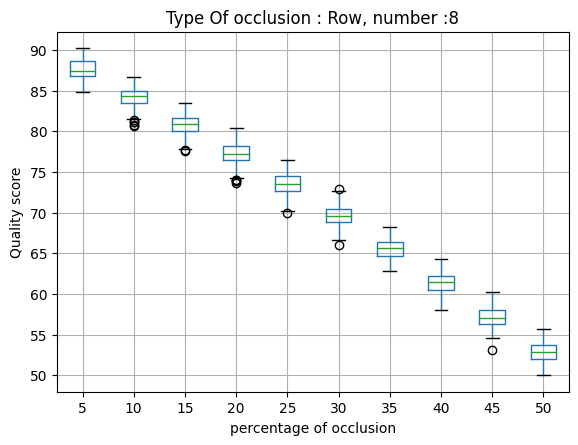

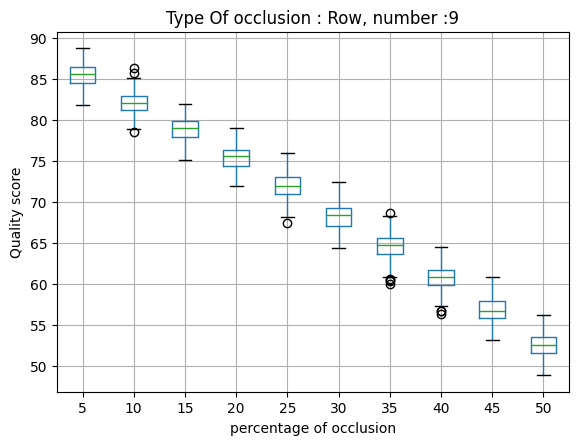

In [11]:
for i in range(10):
    fig, ax = plt.subplots()

    df_row[df_row["number"] == i].boxplot(column = ["OCR_score"],by='percentage_of_occlusion', ax =ax)
    plt.title("Type Of occlusion : Row, number :" + str(i))
    plt.suptitle('')
    plt.xlabel('percentage of occlusion')
    plt.ylabel("Quality score")
    plt.show()

# OCR Score Vs occlusion percentage - NOISE

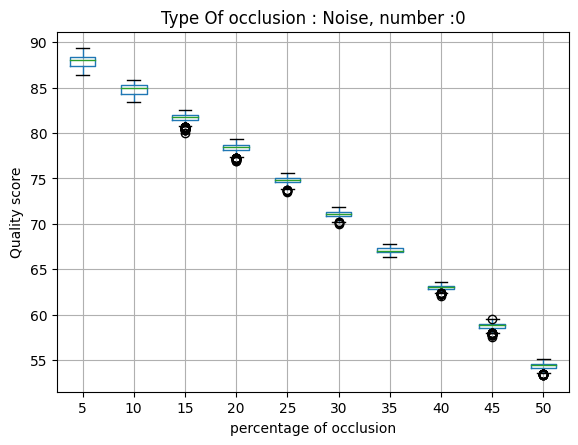

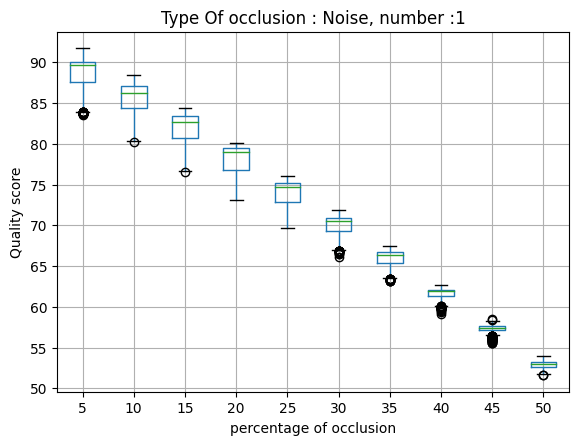

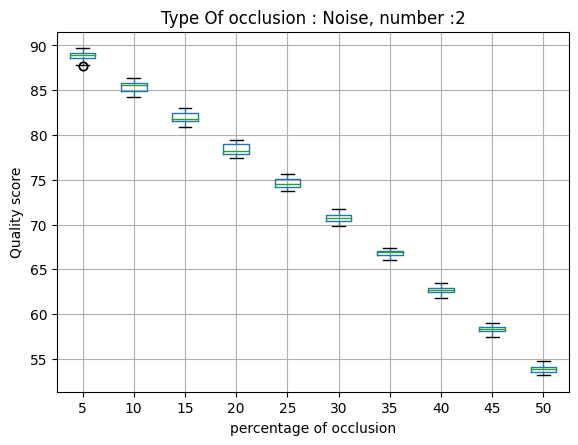

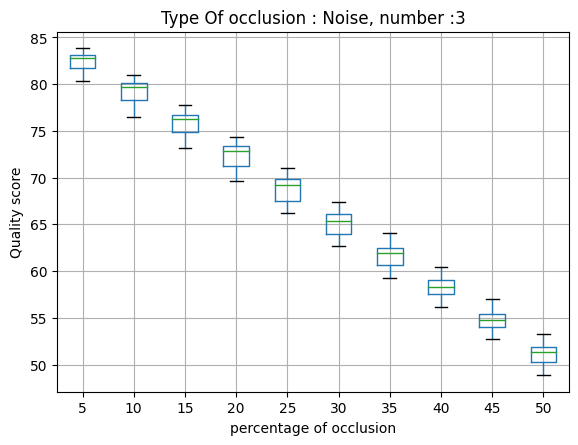

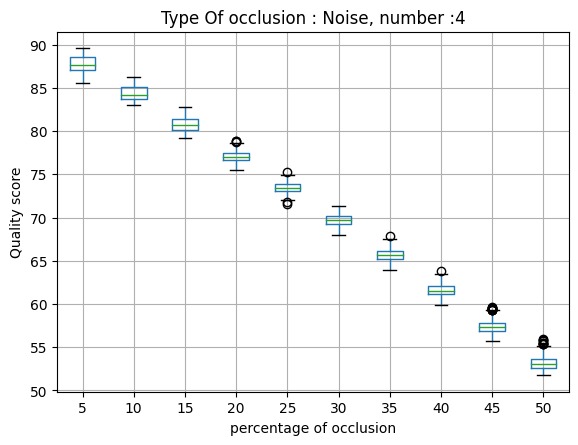

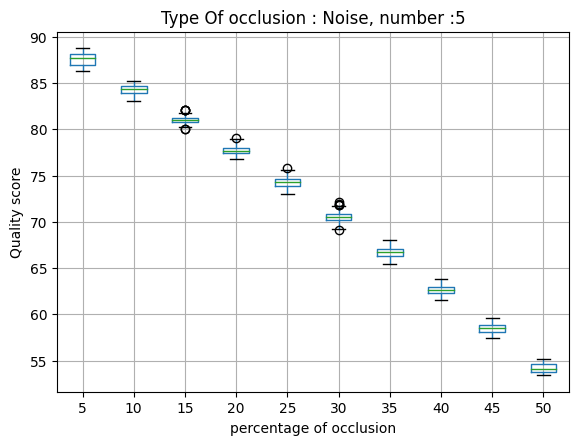

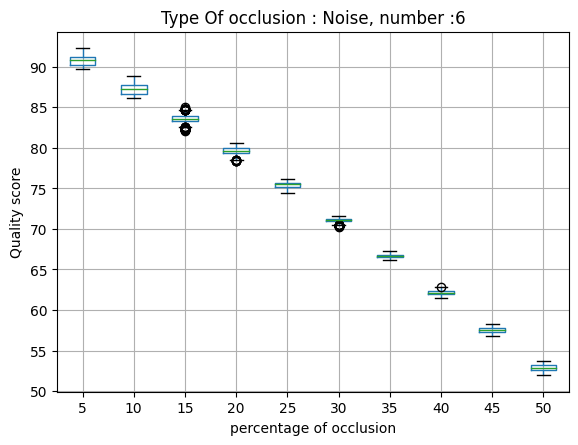

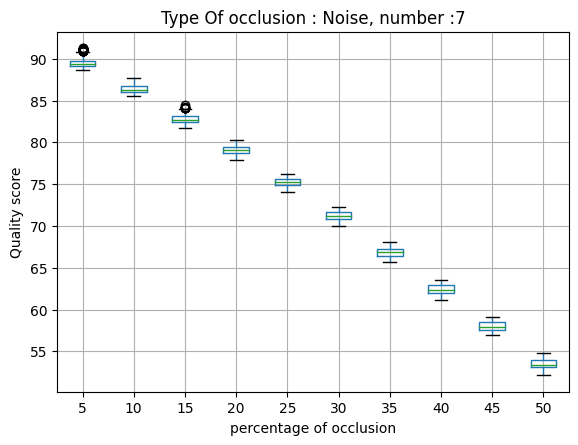

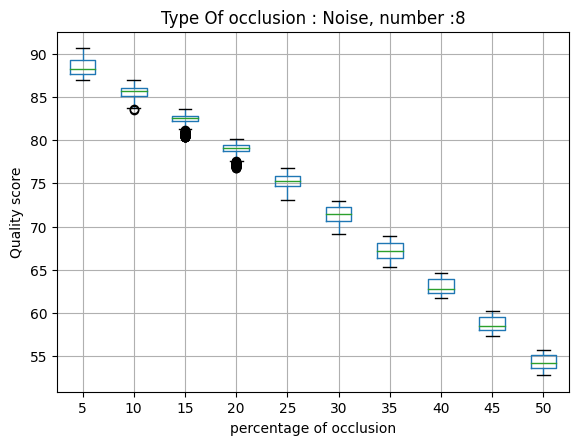

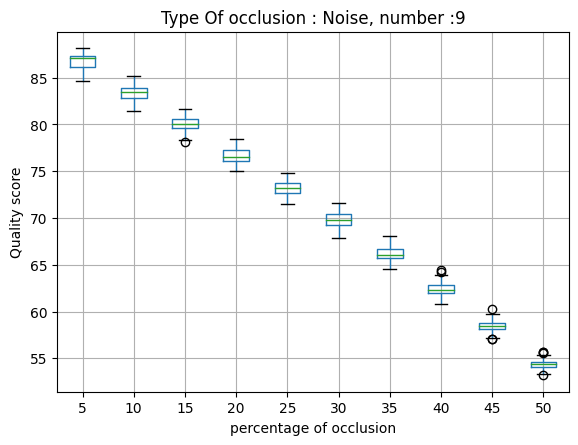

In [12]:
for i in range(10):
    fig, ax = plt.subplots()
    df_noise[df_noise["number"] == i].boxplot(column = ["OCR_score"],by='percentage_of_occlusion', ax =ax)
    plt.title("Type Of occlusion : Noise, number :" + str(i))
    plt.suptitle('')
    plt.xlabel('percentage of occlusion')
    plt.ylabel("Quality score")
    plt.show()

# Test of the critical surface for BLOB

8027
0  :  390
1  :  1384
2  :  38
3  :  706
4  :  1034
5  :  1018
6  :  403
7  :  44
8  :  1104
9  :  1906


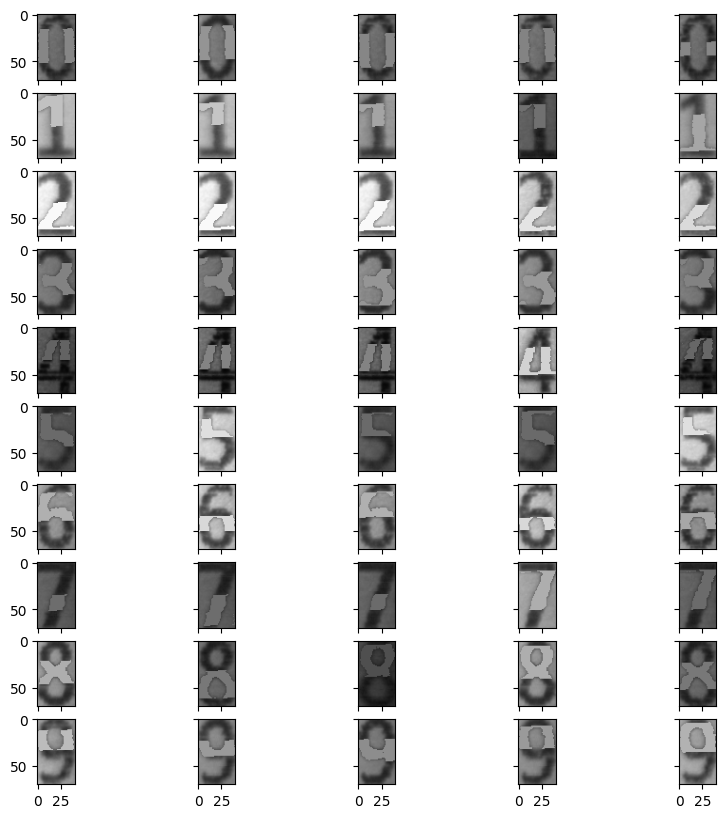

In [13]:
df_blob_nok = df_blob[df_blob["number"] != df_blob["predicted_number"]]
df_blob_nok = df_blob_nok[df_blob_nok["percentage_of_occlusion"] > 10]

print(len(df_blob_nok))
number_mean = []


fig, axs = plt.subplots(10, 5,figsize = (10,10), sharex=True, sharey=True)
for i in range(10):
    df_number = df_blob_nok[df_blob_nok["number"] == i]
    print(str(i)+ "  : ",len(df_number))
    
    mean_img = np.zeros((70,40))
    for idx,nok in df_number.iterrows():
        filepath = nok.loc["file_path"]
        img = cv.imread(filepath,0)
        mean_img += img
        
    mean_img = mean_img/len(df_number)
    number_mean.append(mean_img)
        
    
    if len(df_number)>= 5:
        df_number = df_number.sample(n=5)
        for j in range(5):
            filepath = df_number.iloc[j]["file_path"]
            img = cv.imread(filepath)
            axs[i,j].imshow(img,'gray')
    else:
        for j in range(5):
            
            img = np.zeros((70,40))
            axs[i,j].imshow(img,'gray')
            


## mean of critical surface for BLOB

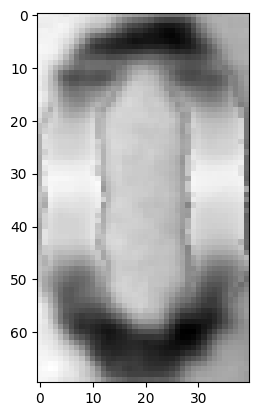

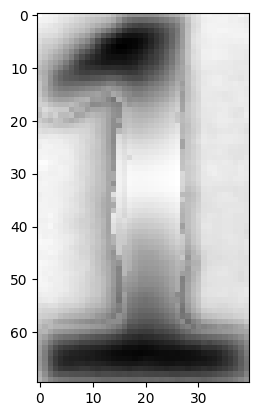

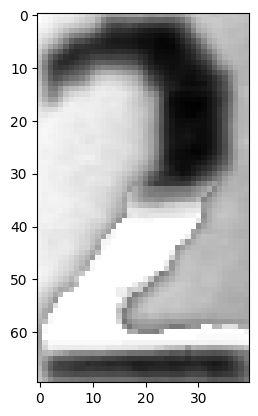

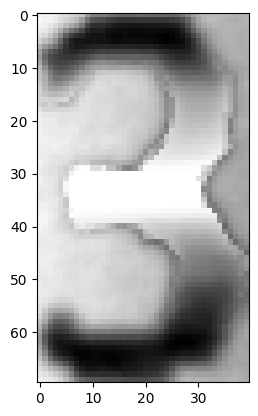

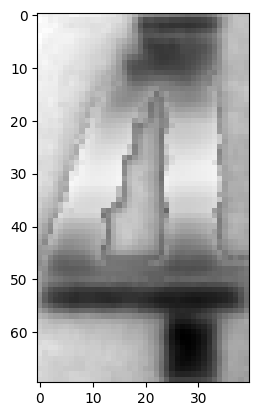

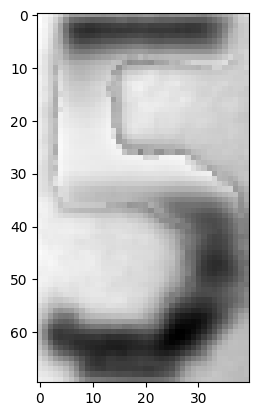

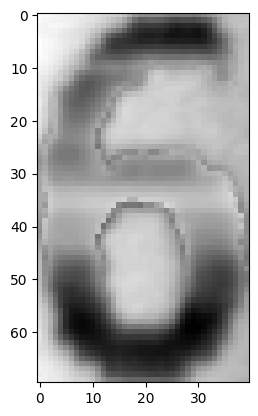

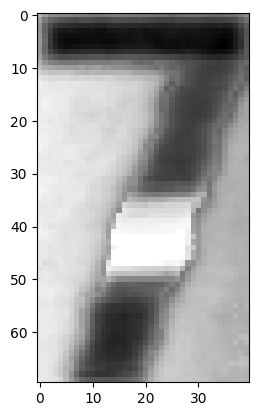

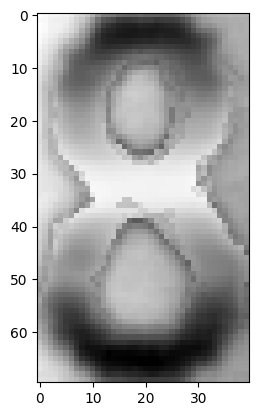

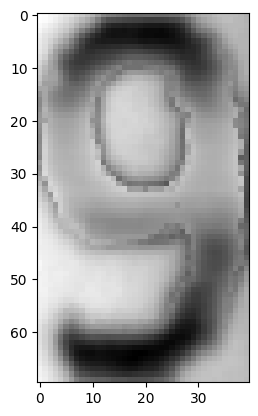

In [14]:
for i in range(10):
    plt.imshow(number_mean[i],'gray')
    plt.show()

## mean of critical surface for ROW

8027
0  :  19
1  :  45
2  :  1
3  :  8
4  :  70
5  :  70
6  :  115
7  :  33
8  :  8
9  :  282


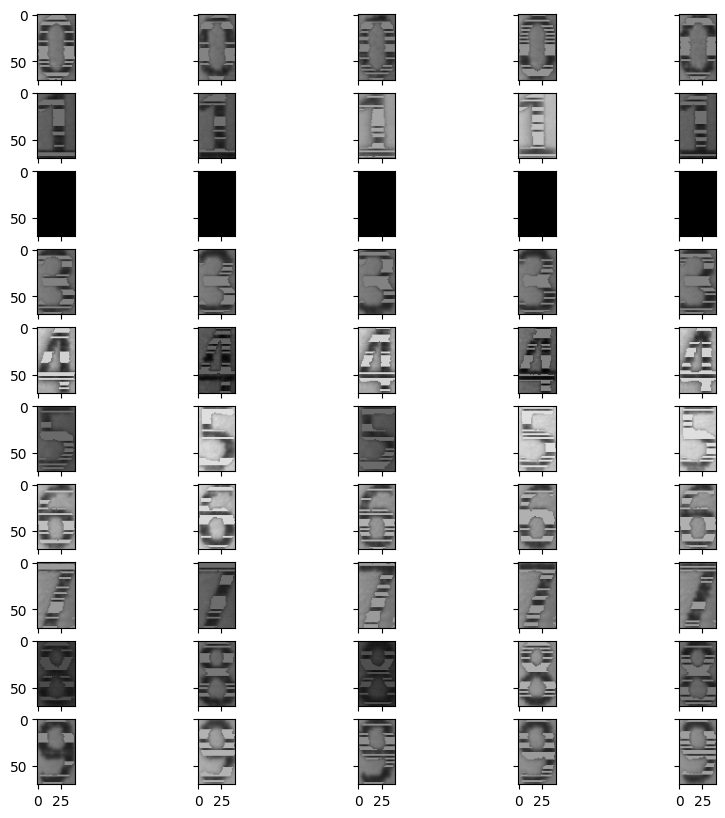

In [15]:
df_row_nok = df_row[df_row["number"] != df_row["predicted_number"]]
df_row_nok = df_row_nok[df_row_nok["percentage_of_occlusion"] > 10]

print(len(df_blob_nok))
number_mean = []


fig, axs = plt.subplots(10, 5,figsize = (10,10), sharex=True, sharey=True)
for i in range(10):
    df_number = df_row_nok[df_row_nok["number"] == i]
    print(str(i)+ "  : ",len(df_number))
    
    mean_img = np.zeros((70,40))
    for idx,nok in df_number.iterrows():
        filepath = nok.loc["file_path"]
        img = cv.imread(filepath,0)
        mean_img += img
        
    mean_img = mean_img/len(df_number)
    number_mean.append(mean_img)
        
    
    if len(df_number)>= 5:
        df_number = df_number.sample(n=5)
        for j in range(5):
            filepath = df_number.iloc[j]["file_path"]
            img = cv.imread(filepath)
            axs[i,j].imshow(img,'gray')
    else:
        for j in range(5):
            
            img = np.zeros((70,40))
            axs[i,j].imshow(img,'gray')

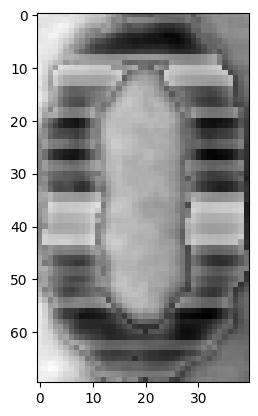

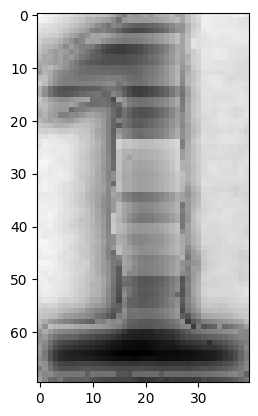

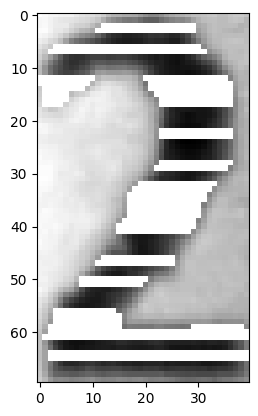

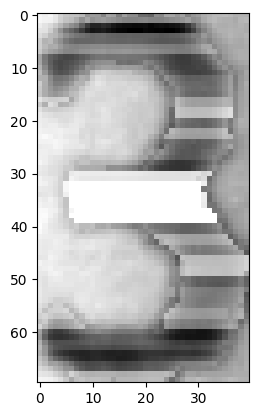

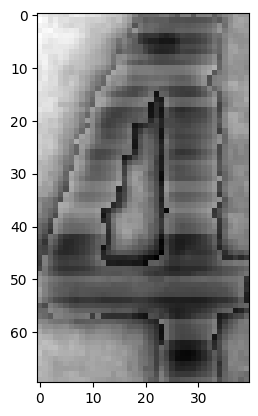

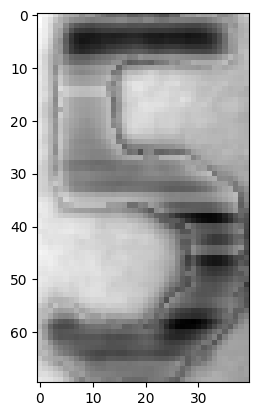

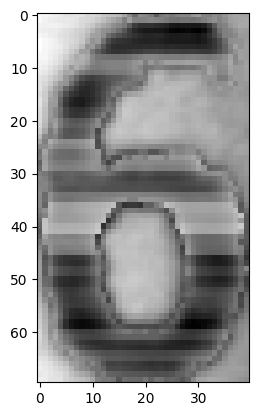

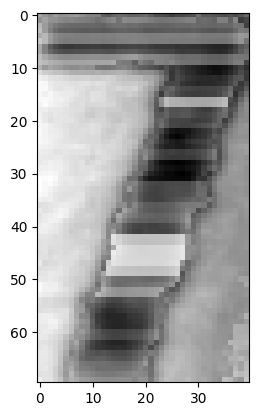

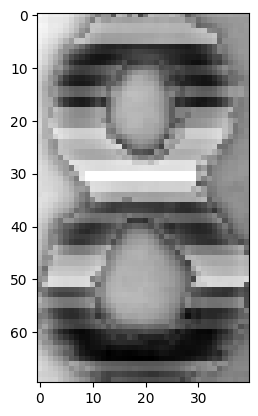

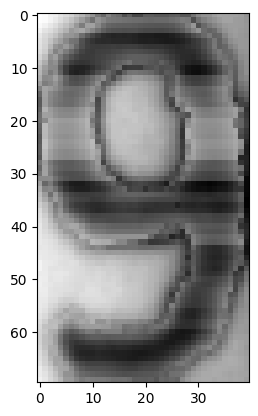

In [16]:
for i in range(10):
    plt.imshow(number_mean[i],'gray')
    plt.show()